In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q kaggle

# Tạo thư mục kaggle và chép file config vào
!mkdir -p ~/.kaggle
!cp "/content/drive/MyDrive/Colab Notebooks/kaggle.json" ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Tạo thư mục đích nếu chưa có
!kaggle datasets download -d immulu/bigearthnetv2-reference-maps

!mkdir -p ./lable_metadata

# Giải nén chỉ 1 file: metadata.parquet
!unzip bigearthnetv2-reference-maps.zip "metadata.parquet" -d ./lable_metadata

Dataset URL: https://www.kaggle.com/datasets/immulu/bigearthnetv2-reference-maps
License(s): Community Data License Agreement - Permissive - Version 1.0
100% 650M/651M [00:03<00:00, 150MB/s]
100% 651M/651M [00:03<00:00, 185MB/s]
Archive:  bigearthnetv2-reference-maps.zip
  inflating: ./lable_metadata/metadata.parquet  


In [ ]:
!pip install efficientnet_pytorch

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.2 MB/s eta 0:00:00
  Created wheel for efficientnet_pytorch: filename=efficientnet_pytorch-0.7.1-py3

In [ ]:
import torch
from efficientnet_pytorch import EfficientNet

# 1. Khởi tạo model architecture
# Luôn dùng CPU
device = torch.device("cpu")
print("⚡ Using device:", device)
# 2. Load weights từ file .pth
model_path = "/content/drive/MyDrive/Document for Capstone/Model/EfficientNet/t-capstone-process-bigearth-nhan-efficientnet-v3.pth"
model = torch.load(model_path, map_location=device, weights_only=False)

# 3. Kiểm tra shape đầu vào bằng cách in shape tensor mẫu chạy qua model
# EfficientNet-B0 mặc định input size là (3, 224, 224) (3 kênh màu RGB)

# dummy_input = torch.randn(12, 3, 224, 224)  # batch size 1, 3 kênh, 224x224 pixels

# output = model(dummy_input)
# print("Output shape:", output.shape)
for name, module in model.named_modules():
    print(name, module)


⚡ Using device: cpu
 EfficientNet(
  (_conv_stem): Conv2d(12, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
  (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
        (static_padding): ZeroPad2d((1, 1, 1, 1))
      )
      (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        32, 8, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        8, 32, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False
        (static_padding): Identity()
      )
      (_

In [ ]:
!unzip "/content/drive/MyDrive/Document for Capstone/bigearthnet_12band_10m.zip" -d /content/

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: /content/content/bigearthnet_12band_10m/S2A_MSIL2A_20170704T112111_N9999_R037_T29SND/S2A_MSIL2A_20170704T112111_N9999_R037_T29SND_41_60_12band.tif  
  inflating: /content/content/bigearthnet_12band_10m/S2A_MSIL2A_20170704T112111_N9999_R037_T29SND/S2A_MSIL2A_20170704T112111_N9999_R037_T29SND_85_77_12band.tif  
  inflating: /content/content/bigearthnet_12band_10m/S2A_MSIL2A_20170704T112111_N9999_R037_T29SND/S2A_MSIL2A_20170704T112111_N9999_R037_T29SND_24_70_12band.tif  
  inflating: /content/content/bigearthnet_12band_10m/S2A_MSIL2A_20170704T112111_N9999_R037_T29SND/S2A_MSIL2A_20170704T112111_N9999_R037_T29SND_78_86_12band.tif  
  inflating: /content/content/bigearthnet_12band_10m/S2A_MSIL2A_20170704T112111_N9999_R037_T29SND/S2A_MSIL2A_20170704T112111_N9999_R037_T29SND_14_53_12band.tif  
  inflating: /content/content/bigearthnet_12band_10m/S2A_MSIL2A_20170704T112111_N9999_R037_T29SND/S2A_MSIL2A_20170704T112111_N9999_R0

In [ ]:
!unzip "/content/drive/MyDrive/Document for Capstone/bigearthnet_12band_10m_1.zip" -d /content/

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: /content/content/bigearthnet_12band_10m_1/S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK/S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK_35_31_12band.tif  
  inflating: /content/content/bigearthnet_12band_10m_1/S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK/S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK_64_20_12band.tif  
  inflating: /content/content/bigearthnet_12band_10m_1/S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK/S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK_15_73_12band.tif  
  inflating: /content/content/bigearthnet_12band_10m_1/S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK/S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK_20_25_12band.tif  
  inflating: /content/content/bigearthnet_12band_10m_1/S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK/S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK_64_81_12band.tif  
  inflating: /content/content/bigearthnet_12band_10m_1/S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK/S2A_MSIL2A_20171101T094

In [ ]:
# Di chuyển toàn bộ nội dung từ bigearthnet_12band_10m_1 vào bigearthnet_12band_10m
!mv /content/content/bigearthnet_12band_10m_1/* /content/content/bigearthnet_12band_10m/

# (Tuỳ chọn) Xoá thư mục rỗng bigearthnet_12band_10m_1
!rmdir /content/content/bigearthnet_12band_10m_1

In [ ]:
# !ls -d content/
# check tên
# /content/content/bigearthnet_12band_10m/S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP/S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_26_57_12band.tif

In [ ]:
import pandas as pd

# Đường dẫn đến file metadata.parquet đã giải nén
parquet_path = './lable_metadata/metadata.parquet'

# Đọc file parquet
df = pd.read_parquet(parquet_path)

print(df.columns)

Index(['patch_id', 'labels', 'split', 'country', 's1_name', 's2v1_name',
       'contains_seasonal_snow', 'contains_cloud_or_shadow'],
      dtype='object')


In [ ]:
df["labels"][15]

array(['Arable land', 'Broad-leaved forest', 'Inland waters', 'Pastures',
       'Urban fabric'], dtype=object)

In [ ]:
from collections import Counter
from itertools import chain

# Chuỗi các nhãn được gộp thành 1 danh sách lớn (flattened list)
all_labels = list(chain.from_iterable(df['labels']))

# Đếm tần suất xuất hiện của từng nhãn
label_counts = Counter(all_labels)

# In ra số nhãn duy nhất
print("Số lượng nhãn duy nhất:", len(label_counts))

# In ra danh sách và số lần xuất hiện
print("\nTần suất xuất hiện của từng nhãn:")
for label, count in label_counts.most_common():
    print(f"{label:40s}: {count}")


Số lượng nhãn duy nhất: 19

Tần suất xuất hiện của từng nhãn:
Arable land                             : 188025
Mixed forest                            : 165780
Coniferous forest                       : 154941
Transitional woodland, shrub            : 141150
Broad-leaved forest                     : 135928
Land principally occupied by agriculture, with significant areas of natural vegetation: 122709
Complex cultivation patterns            : 99598
Pastures                                : 95605
Urban fabric                            : 63758
Inland waters                           : 63212
Marine waters                           : 61832
Agro-forestry areas                     : 33181
Permanent crops                         : 29588
Inland wetlands                         : 20919
Moors, heathland and sclerophyllous vegetation: 13894
Natural grassland and sparsely vegetated areas: 11882
Industrial or commercial units          : 11142
Coastal wetlands                        : 1397
Beaches, du

In [ ]:
import pandas as pd
import numpy as np

# Đọc file metadata.parquet
parquet_path = './lable_metadata/metadata.parquet'
df = pd.read_parquet(parquet_path)

# Danh sách 19 lớp chuẩn
class_list = [
    'Arable land',
    'Mixed forest',
    'Coniferous forest',
    'Transitional woodland, shrub',
    'Broad-leaved forest',
    'Land principally occupied by agriculture, with significant areas of natural vegetation',
    'Complex cultivation patterns',
    'Pastures',
    'Urban fabric',
    'Inland waters',
    'Marine waters',
    'Agro-forestry areas',
    'Permanent crops',
    'Inland wetlands',
    'Moors, heathland and sclerophyllous vegetation',
    'Natural grassland and sparsely vegetated areas',
    'Industrial or commercial units',
    'Coastal wetlands',
    'Beaches, dunes, sands'
]

# Tạo ánh xạ từ tên nhãn sang chỉ số
label_to_idx = {label: i for i, label in enumerate(class_list)}

# Hàm chuyển danh sách nhãn thành vector 19 chiều
def encode_labels(label_list):
    vec = np.zeros(len(class_list), dtype=int)
    for label in label_list:
        if label in label_to_idx:
            vec[label_to_idx[label]] = 1
    return vec.tolist()

# Ghi đè cột 'labels' bằng vector 19 chiều (multi-hot)
df['labels'] = df['labels'].apply(encode_labels)

# Kiểm tra kết quả
print(df.head())

# (Tùy chọn) Lưu lại file parquet hoặc CSV
df.to_parquet('metadata_multilabel_encoded.parquet')


                                            patch_id  \
0  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
1  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
2  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
3  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
4  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   

                                              labels split  country  \
0  [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...  test  Austria   
1  [1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...  test  Austria   
2  [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...  test  Austria   
3  [0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...  test  Austria   
4  [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...  test  Austria   

                                        s1_name  \
0  S1B_IW_GRDH_1SDV_20170612T165809_33UUP_26_57   
1  S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_55   
2  S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_56   
3  S1B_IW_GRDH_1SDV_20170612T165

In [ ]:
df['labels']

0         [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...
1         [1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
2         [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
3         [0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...
4         [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...
                                ...                        
480033    [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480034    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480035    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480036    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480037    [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: labels, Length: 480038, dtype: object

In [ ]:
import os

# Đường dẫn thư mục chứa ảnh đa phổ đã xử lý
data_dir = "/content/content/bigearthnet_12band_10m"

class_counts = {}
total_images = 0

for label in sorted(os.listdir(data_dir)):
    class_path = os.path.join(data_dir, label)
    if os.path.isdir(class_path):
        n_files = len([f for f in os.listdir(class_path) if f.endswith('.tif')])
        class_counts[label] = n_files
        total_images += n_files

# In kết quả
print("Số lượng ảnh mỗi class:")
for label, count in class_counts.items():
    print(f"Class {label}: {count} ảnh")

print(f"\nTổng số ảnh: {total_images}")

Số lượng ảnh mỗi class:
Class S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP: 3305 ảnh
Class S2A_MSIL2A_20170613T101031_N9999_R022_T34VER: 6686 ảnh
Class S2A_MSIL2A_20170617T113321_N9999_R080_T29UPU: 7986 ảnh
Class S2A_MSIL2A_20170701T093031_N9999_R136_T35VPK: 7997 ảnh
Class S2A_MSIL2A_20170704T112111_N9999_R037_T29SND: 8216 ảnh
Class S2A_MSIL2A_20170717T113321_N9999_R080_T29UPA: 370 ảnh
Class S2A_MSIL2A_20170717T113321_N9999_R080_T29UPV: 6013 ảnh
Class S2A_MSIL2A_20170720T100031_N9999_R122_T34UDG: 1540 ảnh
Class S2A_MSIL2A_20170803T094031_N9999_R036_T34TCR: 4864 ảnh
Class S2A_MSIL2A_20170813T112121_N9999_R037_T29SNC: 8222 ảnh
Class S2A_MSIL2A_20170818T103021_N9999_R108_T32TMT: 4888 ảnh
Class S2A_MSIL2A_20170905T095031_N9999_R079_T35VNL: 8229 ảnh
Class S2A_MSIL2A_20170905T095031_N9999_R079_T35WPN: 2292 ảnh
Class S2A_MSIL2A_20171002T094031_N9999_R036_T34TCR: 4864 ảnh
Class S2A_MSIL2A_20171002T094031_N9999_R036_T34TCS: 627 ảnh
Class S2A_MSIL2A_20171002T112111_N9999_R037_T29SNB: 8165 ảnh
Cl

In [ ]:
df['labels']

0         [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...
1         [1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
2         [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
3         [0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...
4         [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...
                                ...                        
480033    [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480034    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480035    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480036    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480037    [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: labels, Length: 480038, dtype: object

In [ ]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 52.4 MB/s eta 0:00:00


Shape của ảnh S2A_MSIL2A_20170905T095031_N9999_R079_T35VNL_31_53_12band.tif: (12, 120, 120) (channels, height, width)


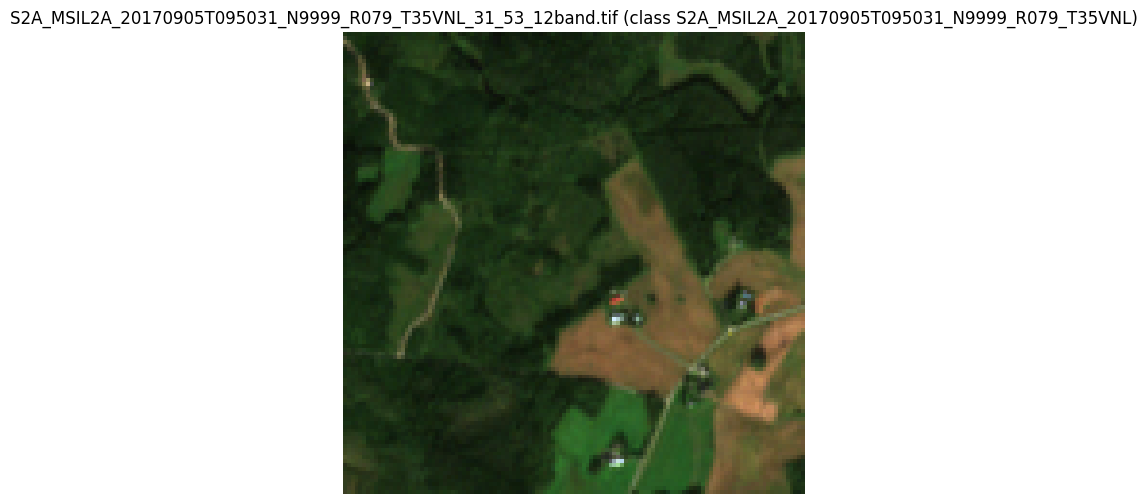

In [ ]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import random

# Chọn ngẫu nhiên 1 class và 1 ảnh trong class
random_class = random.choice(os.listdir(data_dir))
img_path = os.path.join(data_dir, random_class)
random_img = random.choice([f for f in os.listdir(img_path) if f.endswith('.tif')])
img_full_path = os.path.join(img_path, random_img)

# Đọc ảnh
with rasterio.open(img_full_path) as src:
    img = src.read()  # shape: (12, H, W)

# In shape
print(f"Shape của ảnh {random_img}: {img.shape} (channels, height, width)")

# Hiển thị ảnh (dùng band 4,3,2 tương ứng RGB)
rgb = np.stack([img[3], img[2], img[1]], axis=-1)  # Chú ý chỉ số bắt đầu từ 0
rgb = rgb.astype(np.float32)
rgb /= np.max(rgb) + 1e-6  # Chuẩn hóa để hiển thị

plt.figure(figsize=(6, 6))
plt.imshow(rgb)
plt.title(f"{random_img} (class {random_class})")
plt.axis('off')
plt.show()


In [ ]:
df['labels']

0         [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...
1         [1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
2         [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
3         [0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...
4         [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...
                                ...                        
480033    [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480034    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480035    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480036    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480037    [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: labels, Length: 480038, dtype: object

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from glob import glob

# 1. Đường dẫn gốc chứa các thư mục con
IMAGE_DIR = "/content/content/bigearthnet_12band_10m"

# 2. Đọc metadata chứa patch_id và labels
# df = pd.read_parquet("./lable_metadata/metadata.parquet")

# 3. Duyệt toàn bộ ảnh trong thư mục con, tạo ánh xạ patch_id → đường dẫn ảnh
tif_paths = glob(os.path.join(IMAGE_DIR, "*", "*_12band.tif"))

patch_to_path = {
    os.path.basename(path).replace("_12band.tif", ""): path
    for path in tif_paths
}

# 4. Giữ lại các patch_id có ảnh thật sự
df = df[df['patch_id'].isin(patch_to_path)]

# 5. Gán cột image_path theo ánh xạ tìm được
df['image_path'] = df['patch_id'].map(patch_to_path)

# 6. Chia ngẫu nhiên train/val/test (70/15/15)
train_val_df, test_df = train_test_split(df, test_size=0.15, random_state=42, shuffle=True)
train_df, val_df = train_test_split(train_val_df, test_size=0.1765, random_state=42)

# 7. Tạo danh sách (image_path, labels)
train_list = list(zip(train_df['image_path'], train_df['labels']))
val_list = list(zip(val_df['image_path'], val_df['labels']))
test_list = list(zip(test_df['image_path'], test_df['labels']))

# 8. In kết quả
print(f"Số ảnh train: {len(train_list)}")
print(f"Số ảnh val:   {len(val_list)}")
print(f"Số ảnh test:  {len(test_list)}")

df.head()

/tmp/ipython-input-3882315738.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['image_path'] = df['patch_id'].map(patch_to_path)


Số ảnh train: 71741
Số ảnh val:   15377
Số ảnh test:  15374


patch_id  \
0  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
1  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
2  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
3  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
4  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   

                                              labels split  country  \
0  [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...  test  Austria   
1  [1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...  test  Austria   
2  [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...  test  Austria   
3  [0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...  test  Austria   
4  [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...  test  Austria   

                                        s1_name  \
0  S1B_IW_GRDH_1SDV_20170612T165809_33UUP_26_57   
1  S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_55   
2  S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_56   
3  S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_57   
4  S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_58   

                          s2v1_name  contains_seasonal_snow  \
0  S2A_MSIL2A_20170613T101031_26_57                   False   
1  S2A_MSIL2A_20170613T101031_27_55                   False   
2  S2A_MSIL2A_20170613T101031_27_56                   False   
3  S2A_MSIL2A_20170613T101031_27_57                   False   
4  S2A_MSIL2A_20170613T101031_27_58                   False   

   contains_cloud_or_shadow                                         image_path  
0                     False  /content/content/bigearthnet_12band_10m/S2A_MS...  
1                     False  /content/content/bigearthnet_12band_10m/S2A_MS...  
2                     False  /content/content/bigearthnet_12band_10m/S2A_MS...  
3                     False  /content/content/bigearthnet_12band_10m/S2A_MS...  
4                     False  /content/content/bigearthnet_12band_10m/S2A_MS...

In [ ]:
train_list[0]

('/content/content/bigearthnet_12band_10m/S2A_MSIL2A_20170803T094031_N9999_R036_T34TCR/S2A_MSIL2A_20170803T094031_N9999_R036_T34TCR_64_29_12band.tif',
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Kiểm tra những ảnh KHÔNG có trong metadata
tif_patch_ids = set([os.path.basename(p).replace('_12band.tif', '') for p in tif_paths])
metadata_patch_ids = set(df['patch_id'].tolist())

missing_from_metadata = tif_patch_ids - metadata_patch_ids
print(f"Số ảnh KHÔNG có metadata: {len(missing_from_metadata)}")


Số ảnh KHÔNG có metadata: 9718


In [ ]:
# Số ảnh thực sự trong thư mục
print("Tổng số file ảnh .tif:", len(tif_paths))

# Số patch_id có metadata
print("Tổng số patch_id trong metadata:", len(df))

# Số ảnh tồn tại đồng thời cả trong thư mục và metadata
common_ids = set(df['patch_id']).intersection(set(patch_to_path))
print("Số patch_id khớp được cả metadata và ảnh:", len(common_ids))


Tổng số file ảnh .tif: 112210
Tổng số patch_id trong metadata: 102492
Số patch_id khớp được cả metadata và ảnh: 102492


In [ ]:
import os
from glob import glob

# 1. Đường dẫn thư mục ảnh
IMAGE_DIR = "/content/content/bigearthnet_12band_10m"

# 2. Lấy tất cả file .tif (ảnh 12 band) trong mọi thư mục con
tif_paths = glob(os.path.join(IMAGE_DIR, "*", "*_12band.tif"))

# 3. Lấy patch_id từ tên file
tif_patch_ids = set(os.path.basename(p).replace('_12band.tif', '') for p in tif_paths)

# 4. Lấy patch_id từ metadata
import pandas as pd
df = pd.read_parquet("./lable_metadata/metadata.parquet")
metadata_patch_ids = set(df['patch_id'].tolist())

# 5. Tìm ảnh bị thiếu trong metadata
missing_patch_ids = tif_patch_ids - metadata_patch_ids

# 6. In số lượng và một vài ví dụ
print(f"Số ảnh .tif không có metadata: {len(missing_patch_ids)}")
print("Ví dụ các ảnh bị thiếu:")
for pid in list(missing_patch_ids)[:10]:
    print(f"- {pid}_12band.tif")


Số ảnh .tif không có metadata: 9718
Ví dụ các ảnh bị thiếu:
- S2A_MSIL2A_20170905T095031_N9999_R079_T35VNL_73_67_12band.tif
- S2A_MSIL2A_20170905T095031_N9999_R079_T35VNL_32_78_12band.tif
- S2A_MSIL2A_20171101T094131_N9999_R036_T35VNJ_31_33_12band.tif
- S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK_84_63_12band.tif
- S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK_50_50_12band.tif
- S2A_MSIL2A_20170701T093031_N9999_R136_T35VPK_51_69_12band.tif
- S2A_MSIL2A_20171101T094131_N9999_R036_T35VNJ_54_82_12band.tif
- S2A_MSIL2A_20170905T095031_N9999_R079_T35VNL_74_61_12band.tif
- S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK_02_31_12band.tif
- S2A_MSIL2A_20171101T094131_N9999_R036_T35VNJ_24_12_12band.tif


In [ ]:
import pandas as pd

# Đọc metadata
df = pd.read_parquet('./lable_metadata/metadata.parquet')

# Patch cần kiểm tra
patch_id = "S2A_MSIL2A_20170701T093031_N9999_R136_T35VPK_69_71"

# Kiểm tra tồn tại
exists = patch_id in df['patch_id'].values
print(f"Tồn tại trong metadata: {'Có' if exists else 'Không'}")


Tồn tại trong metadata: Không


In [ ]:
!pip install albumentations

In [ ]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

train_transform = A.Compose([
    # A.Normalize(mean=[0]*12, std=[1]*12, max_pixel_value=1.0),

    A.Resize(224, 224),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, p=0.5),
    A.Normalize(mean=0.0, std=1.0, max_pixel_value=1.0),
    ToTensorV2(transpose_mask=True),
])

val_transform = A.Compose([
    A.Resize(224, 224),
    A.Normalize(mean=[0]*12, std=[1]*12, max_pixel_value=1.0),
    ToTensorV2(transpose_mask=False)
])


/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


In [ ]:
from torch.utils.data import Dataset
import torch
import tifffile as tiff

class BigEarthNetDataset(Dataset):
    def __init__(self, data_list, transform=None):
        self.data_list = data_list
        self.transform = transform

    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, idx):
        img_path, label = self.data_list[idx]

        with rasterio.open(img_path) as src:
            image = src.read()  # (12, H, W)

        image = image.astype(np.float32) / 10000.0
        image = np.transpose(image, (1, 2, 0))  # (H, W, C) cho Albumentations

        if self.transform:
            augmented = self.transform(image=image)
            image = augmented['image']
        else:
            image = torch.tensor(np.transpose(image, (2, 0, 1)))  # (C, H, W)

        label = np.array(label, dtype=np.float32)  # ép kiểu numeric
        label = torch.tensor(label, dtype=torch.float32)

        return image, label


In [ ]:
from torch.utils.data import DataLoader

# Batch size
BATCH_SIZE = 64

# Dataset
train_dataset = BigEarthNetDataset(train_list, transform=train_transform)
val_dataset = BigEarthNetDataset(val_list, transform=val_transform)
test_dataset = BigEarthNetDataset(test_list, transform=val_transform)

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=8, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [ ]:
train_dataset[0][1].shape

torch.Size([19])

Label Tensor: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0.])
Shape: torch.Size([19])
Non-zero class indices: 10
Non-zero class count: 1.0


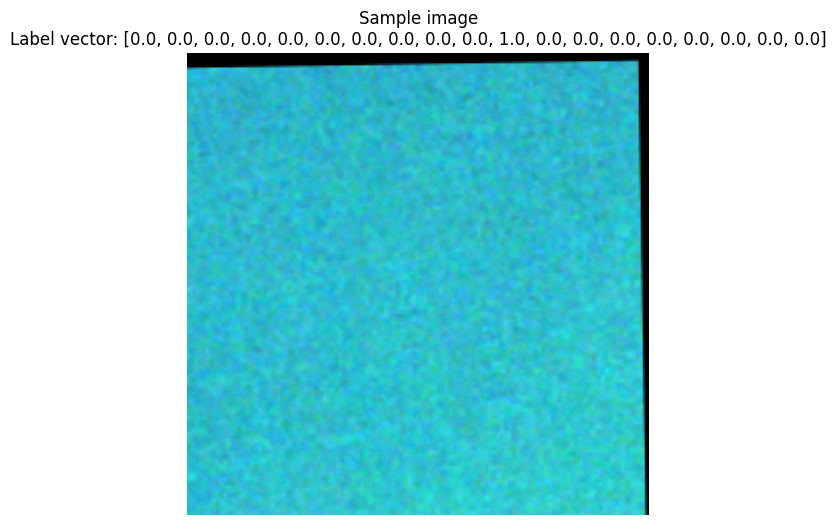

In [ ]:
# Lấy 1 mẫu bất kỳ từ train_dataset
sample_img, sample_label = train_dataset[5]

# Kiểm tra thông tin label
print("Label Tensor:", sample_label)
print("Shape:", sample_label.shape)
print("Non-zero class indices:", torch.nonzero(sample_label).squeeze().tolist())
print("Non-zero class count:", torch.sum(sample_label).item())

# Chuyển tensor về numpy để hiển thị
sample_img_np = sample_img.numpy().transpose(1, 2, 0)  # (H, W, C)

# Lấy lại các band RGB (band 4, 3, 2 --> index 3, 2, 1)
rgb = sample_img_np[:, :, [3, 2, 1]]

# Chuẩn hóa về [0, 1] nếu cần (nếu bạn đã normalize thì giá trị có thể lệch)
rgb = (rgb - rgb.min()) / (rgb.max() - rgb.min() + 1e-6)

# Hiển thị ảnh
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.imshow(rgb)
plt.title(f"Sample image\nLabel vector: {sample_label.tolist()}")
plt.axis("off")
plt.show()


In [ ]:
!pip install timm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 849.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Luôn dùng CPU
# device = torch.device("cpu")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Load model ViT đã huấn luyện (trên CPU)
# model_path = "/content/drive/MyDrive/Document for Capstone/Model/Vit_Bigearthnet_mAP.pth"
model_path = "/content/drive/MyDrive/Document for Capstone/Model/my_pytorch_model_bigearth_1.pth"
model = torch.load(model_path, map_location=device, weights_only=False)
model.eval()
print("Model loaded and moved to", device)
print(model.head)

random_image = torch.rand((12, 224, 224), dtype=torch.float32).to(device)  # Đưa ảnh lên GPU

with torch.no_grad():
    output = model(random_image.unsqueeze(0))
    predicted = (output.squeeze() > 0.5).cpu().numpy()  # Threshold 0.5 để multi-label

# print("Predicted Labels (binary vector):\n", predicted)
print("Output sigmoid:\n", output.squeeze().cpu().numpy())
print("Predicted Labels:\n", predicted)

⚡ Using device: cpu
Model loaded and moved to cpu
Sequential(
  (0): Linear(in_features=768, out_features=19, bias=True)
  (1): Sigmoid()
)
Output sigmoid:
 [6.48263202e-04 3.24903260e-04 4.46625374e-04 7.44220044e-04
 3.22414999e-04 3.36396537e-04 2.84623471e-04 1.52051012e-04
 2.12395666e-04 3.73097742e-03 9.94811773e-01 8.19915367e-05
 1.17842086e-04 1.21996010e-04 1.20449746e-04 3.23032291e-05
 1.09880544e-04 3.01502987e-05 1.82768727e-05]
Predicted Labels:
 [False False False False False False False False False False  True False
 False False False False False False False]


EVALUATE SHAP

In [ ]:
!pip install rbo


CLASS 0

F1-Base: 0.88

Top bands by LIME:     ['B8', 'B7', 'B12', 'B3', 'B9']
Top bands by SHAP:     ['B3', 'B7', 'B12', 'B8', 'B4']
Top bands by Baseline (low → important): ['B3', 'B12', 'B7', 'B8', 'B11']

Same-Sign Score (LIME vs SHAP):     0.8333333333333334

Spearman correlation (LIME vs SHAP):     0.692
Spearman correlation (LIME vs Baseline): 0.599
Spearman correlation (SHAP vs Baseline): 0.515

RBO (LIME vs SHAP):     0.224
RBO (LIME vs Baseline): 0.179
RBO (SHAP vs Baseline): 0.351

Intersection Ratio (Baseline ∩ (LIME ∪ SHAP)): 0.667

Jaccard Similarity (LIME vs SHAP):     0.667
Jaccard Similarity (LIME vs Baseline): 0.667
Jaccard Similarity (SHAP vs Baseline): 0.667


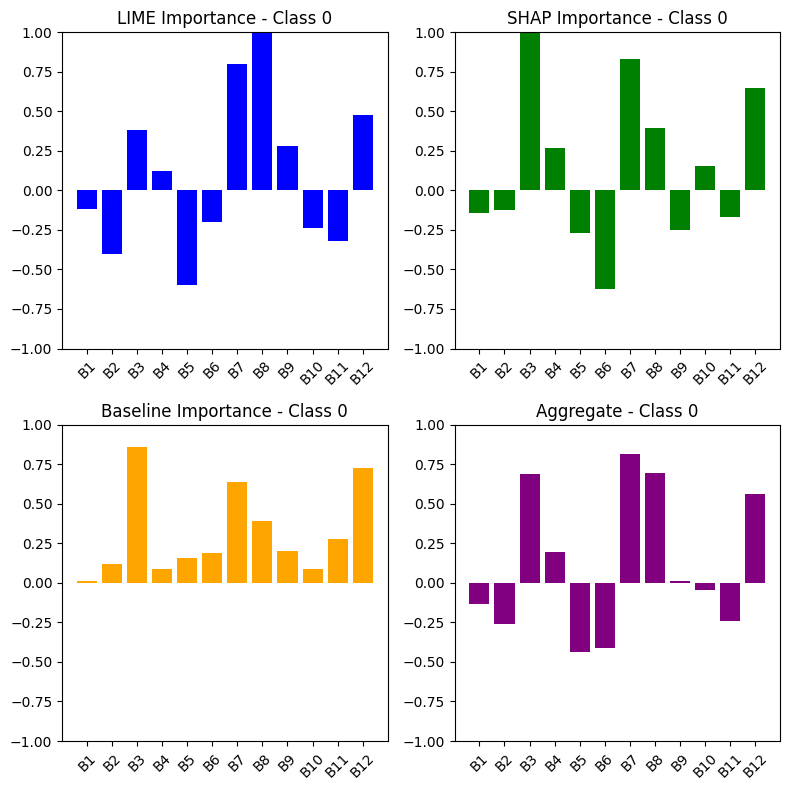

Spearman correlation (Avg vs Baseline): [np.float64(0.5674264393540605)]
RBO (Avg vs Baseline): [0.179388]
Jaccard Similarity (Avg vs Baseline): [0.6666666666666666]
Spearman 0.567 ± 0.000
RBO 0.179 ± 0.000
Jaccard 0.667 ± 0.000

CLASS 1

F1-Base: 0.85

Top bands by LIME:     ['B8', 'B11', 'B9', 'B2', 'B1']
Top bands by SHAP:     ['B8', 'B12', 'B9', 'B3', 'B10']
Top bands by Baseline (low → important): ['B9', 'B8', 'B7', 'B6', 'B11']

Same-Sign Score (LIME vs SHAP):     0.5

Spearman correlation (LIME vs SHAP):     0.102
Spearman correlation (LIME vs Baseline): 0.273
Spearman correlation (SHAP vs Baseline): 0.203

RBO (LIME vs SHAP):     0.262
RBO (LIME vs Baseline): 0.175
RBO (SHAP vs Baseline): 0.162

Intersection Ratio (Baseline ∩ (LIME ∪ SHAP)): 0.375

Jaccard Similarity (LIME vs SHAP):     0.250
Jaccard Similarity (LIME vs Baseline): 0.429
Jaccard Similarity (SHAP vs Baseline): 0.250


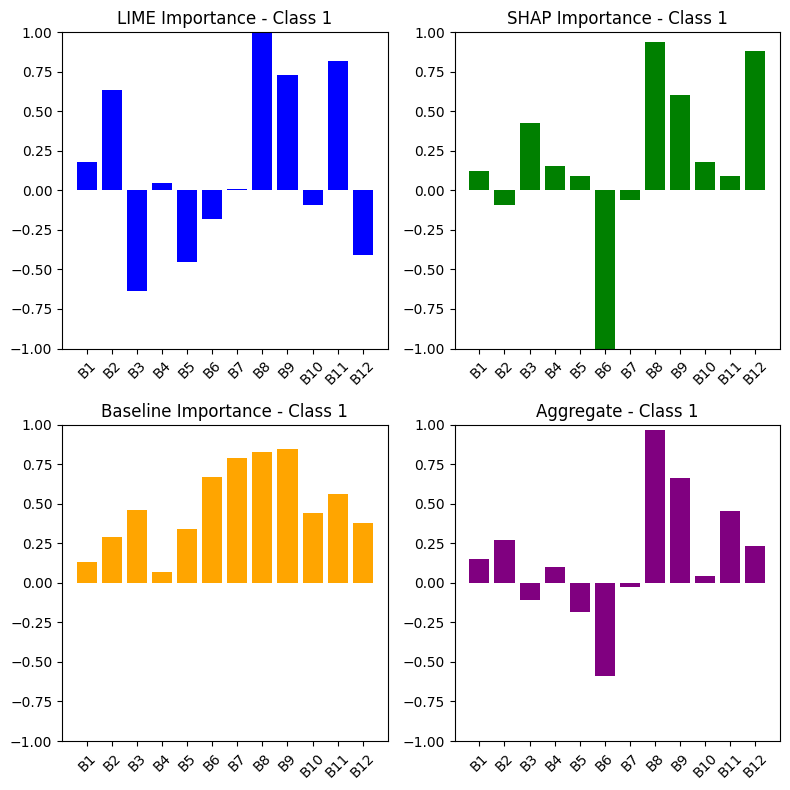

Spearman correlation (Avg vs Baseline): [np.float64(0.5674264393540605), np.float64(0.22377622377622378)]
RBO (Avg vs Baseline): [0.179388, 0.21981599999999993]
Jaccard Similarity (Avg vs Baseline): [0.6666666666666666, 0.42857142857142855]
Spearman 0.396 ± 0.172
RBO 0.200 ± 0.020
Jaccard 0.548 ± 0.119

CLASS 2

F1-Base: 0.89

Top bands by LIME:     ['B8', 'B6', 'B2', 'B11', 'B1']
Top bands by SHAP:     ['B11', 'B3', 'B9', 'B8', 'B10']
Top bands by Baseline (low → important): ['B6', 'B9', 'B3', 'B7', 'B5']

Same-Sign Score (LIME vs SHAP):     0.4166666666666667

Spearman correlation (LIME vs SHAP):     -0.189
Spearman correlation (LIME vs Baseline): 0.086
Spearman correlation (SHAP vs Baseline): -0.007

RBO (LIME vs SHAP):     0.063
RBO (LIME vs Baseline): 0.103
RBO (SHAP vs Baseline): 0.117

Intersection Ratio (Baseline ∩ (LIME ∪ SHAP)): 0.375

Jaccard Similarity (LIME vs SHAP):     0.250
Jaccard Similarity (LIME vs Baseline): 0.111
Jaccard Similarity (SHAP vs Baseline): 0.250


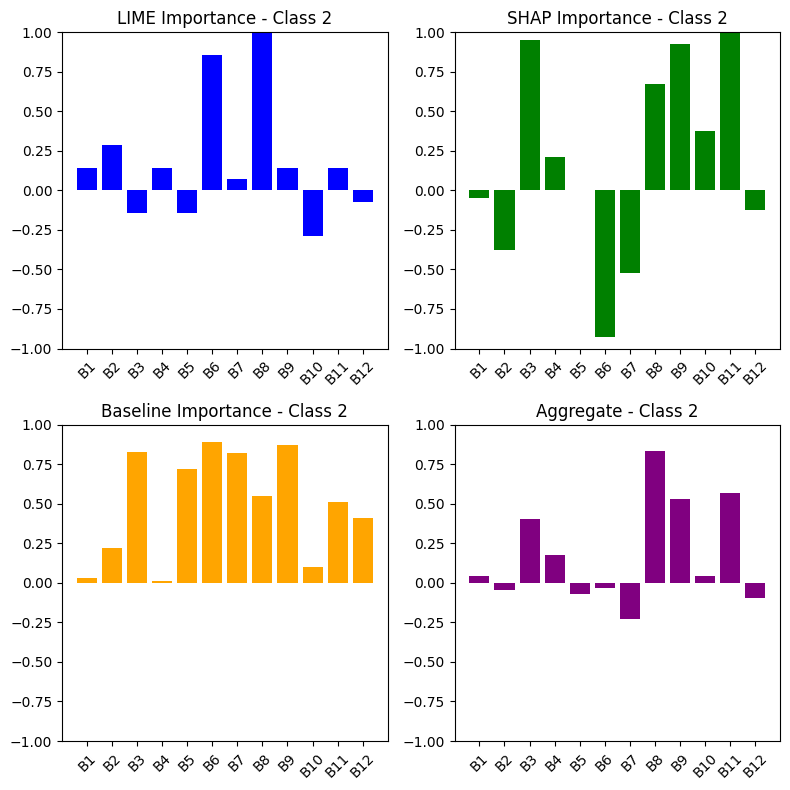

Spearman correlation (Avg vs Baseline): [np.float64(0.5674264393540605), np.float64(0.22377622377622378), np.float64(0.013986013986013986)]
RBO (Avg vs Baseline): [0.179388, 0.21981599999999993, 0.089694]
Jaccard Similarity (Avg vs Baseline): [0.6666666666666666, 0.42857142857142855, 0.25]
Spearman 0.268 ± 0.228
RBO 0.163 ± 0.054
Jaccard 0.448 ± 0.171

CLASS 3

F1-Base: 0.67

Top bands by LIME:     ['B11', 'B4', 'B8', 'B5', 'B9']
Top bands by SHAP:     ['B3', 'B8', 'B7', 'B12', 'B4']
Top bands by Baseline (low → important): ['B6', 'B3', 'B5', 'B7', 'B12']

Same-Sign Score (LIME vs SHAP):     0.3333333333333333

Spearman correlation (LIME vs SHAP):     -0.070
Spearman correlation (LIME vs Baseline): -0.445
Spearman correlation (SHAP vs Baseline): -0.106

RBO (LIME vs SHAP):     0.071
RBO (LIME vs Baseline): 0.031
RBO (SHAP vs Baseline): 0.148

Intersection Ratio (Baseline ∩ (LIME ∪ SHAP)): 0.500

Jaccard Similarity (LIME vs SHAP):     0.250
Jaccard Similarity (LIME vs Baseline): 0.111
J

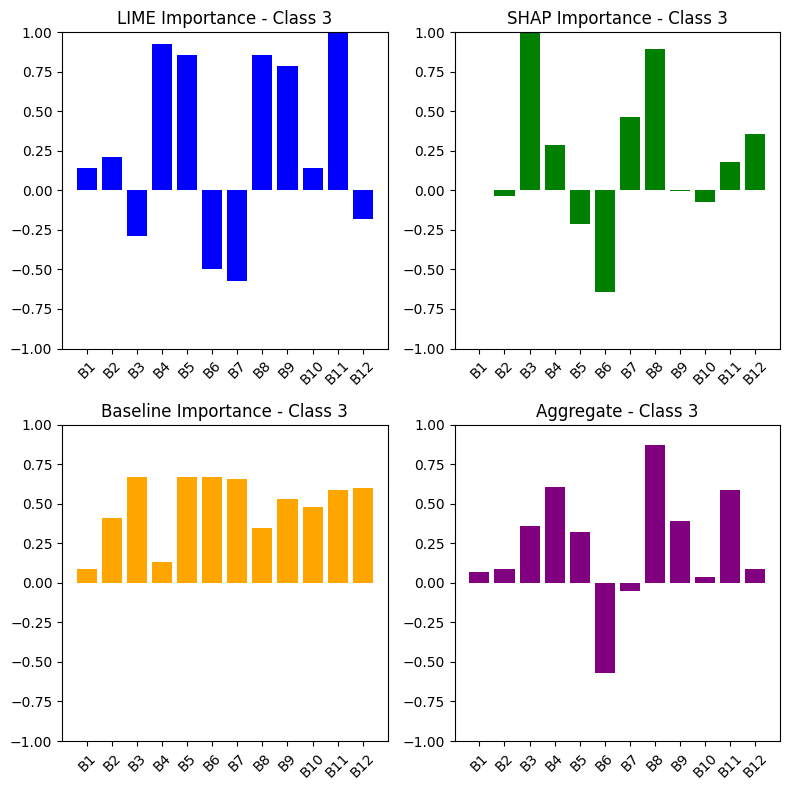

Spearman correlation (Avg vs Baseline): [np.float64(0.5674264393540605), np.float64(0.22377622377622378), np.float64(0.013986013986013986), np.float64(-0.30986683868975945)]
RBO (Avg vs Baseline): [0.179388, 0.21981599999999993, 0.089694, 0.013121999999999998]
Jaccard Similarity (Avg vs Baseline): [0.6666666666666666, 0.42857142857142855, 0.25, 0.1111111111111111]
Spearman 0.124 ± 0.319
RBO 0.126 ± 0.080
Jaccard 0.364 ± 0.208

CLASS 4

F1-Base: 0.73

Top bands by LIME:     ['B11', 'B9', 'B8', 'B1', 'B4']
Top bands by SHAP:     ['B11', 'B3', 'B8', 'B9', 'B10']
Top bands by Baseline (low → important): ['B11', 'B9', 'B7', 'B6', 'B8']

Same-Sign Score (LIME vs SHAP):     0.5

Spearman correlation (LIME vs SHAP):     0.431
Spearman correlation (LIME vs Baseline): 0.265
Spearman correlation (SHAP vs Baseline): 0.331

RBO (LIME vs SHAP):     0.293
RBO (LIME vs Baseline): 0.320
RBO (SHAP vs Baseline): 0.248

Intersection Ratio (Baseline ∩ (LIME ∪ SHAP)): 0.429

Jaccard Similarity (LIME vs SHAP

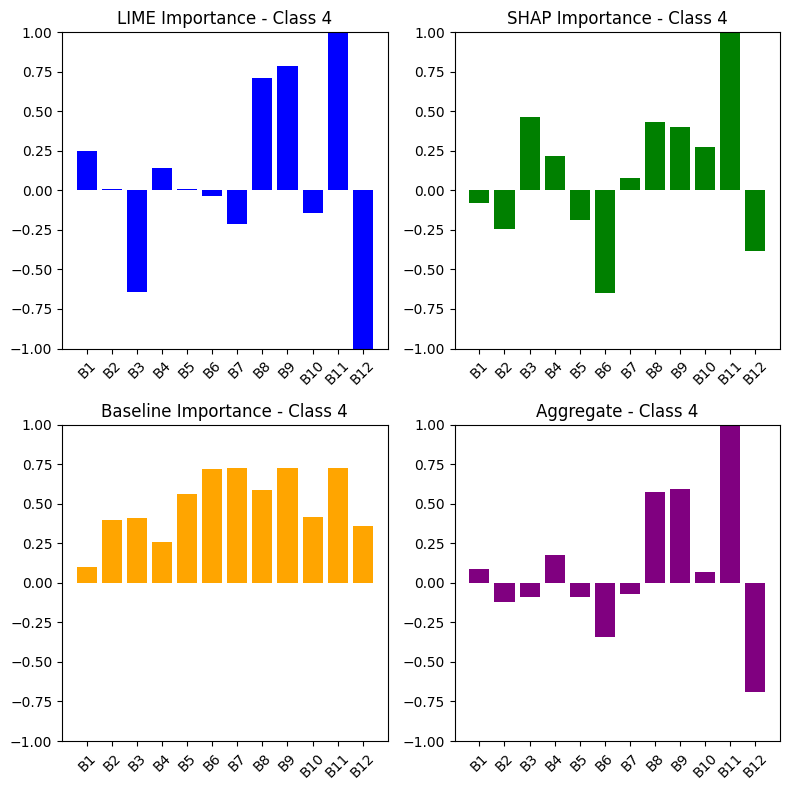

Spearman correlation (Avg vs Baseline): [np.float64(0.5674264393540605), np.float64(0.22377622377622378), np.float64(0.013986013986013986), np.float64(-0.30986683868975945), np.float64(0.3380365512979194)]
RBO (Avg vs Baseline): [0.179388, 0.21981599999999993, 0.089694, 0.013121999999999998, 0.31981599999999993]
Jaccard Similarity (Avg vs Baseline): [0.6666666666666666, 0.42857142857142855, 0.25, 0.1111111111111111, 0.42857142857142855]
Spearman 0.167 ± 0.298
RBO 0.164 ± 0.106
Jaccard 0.377 ± 0.188

CLASS 5

F1-Base: 0.58

Top bands by LIME:     ['B8', 'B3', 'B12', 'B11', 'B4']
Top bands by SHAP:     ['B3', 'B8', 'B12', 'B7', 'B4']
Top bands by Baseline (low → important): ['B6', 'B3', 'B5', 'B7', 'B11']

Same-Sign Score (LIME vs SHAP):     0.8333333333333334

Spearman correlation (LIME vs SHAP):     0.782
Spearman correlation (LIME vs Baseline): -0.111
Spearman correlation (SHAP vs Baseline): -0.043

RBO (LIME vs SHAP):     0.278
RBO (LIME vs Baseline): 0.116
RBO (SHAP vs Baseline): 0.

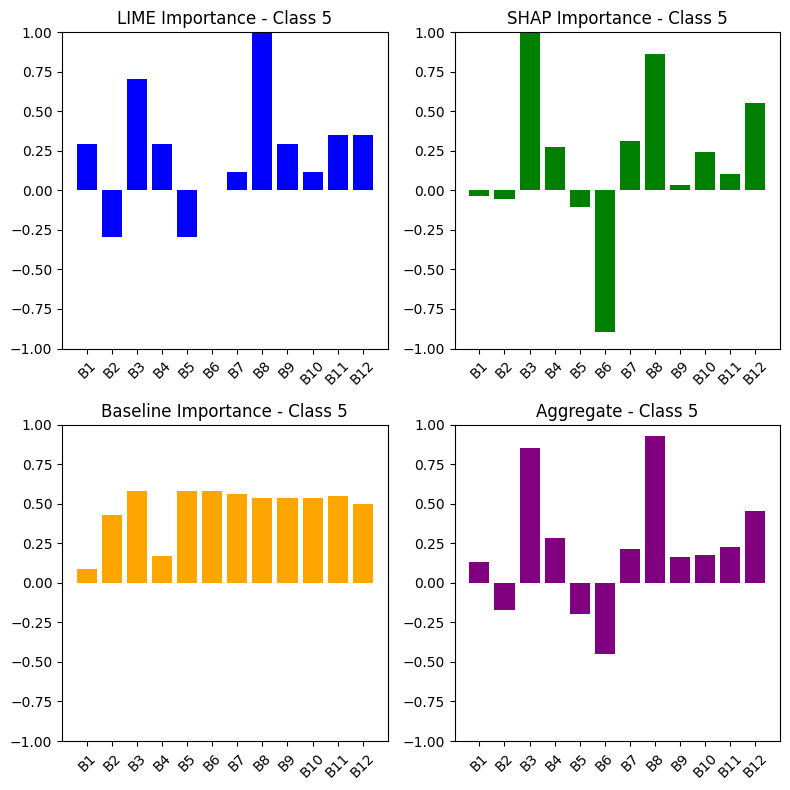

Spearman correlation (Avg vs Baseline): [np.float64(0.5674264393540605), np.float64(0.22377622377622378), np.float64(0.013986013986013986), np.float64(-0.30986683868975945), np.float64(0.3380365512979194), np.float64(-0.12057950662162813)]
RBO (Avg vs Baseline): [0.179388, 0.21981599999999993, 0.089694, 0.013121999999999998, 0.31981599999999993, 0.11646899999999996]
Jaccard Similarity (Avg vs Baseline): [0.6666666666666666, 0.42857142857142855, 0.25, 0.1111111111111111, 0.42857142857142855, 0.25]
Spearman 0.119 ± 0.292
RBO 0.156 ± 0.098
Jaccard 0.356 ± 0.178

CLASS 6

F1-Base: 0.54

Top bands by LIME:     ['B3', 'B12', 'B8', 'B4', 'B11']
Top bands by SHAP:     ['B3', 'B8', 'B11', 'B12', 'B4']
Top bands by Baseline (low → important): ['B12', 'B11', 'B10', 'B8', 'B3']

Same-Sign Score (LIME vs SHAP):     0.8333333333333334

Spearman correlation (LIME vs SHAP):     0.874
Spearman correlation (LIME vs Baseline): 0.303
Spearman correlation (SHAP vs Baseline): 0.233

RBO (LIME vs SHAP):     

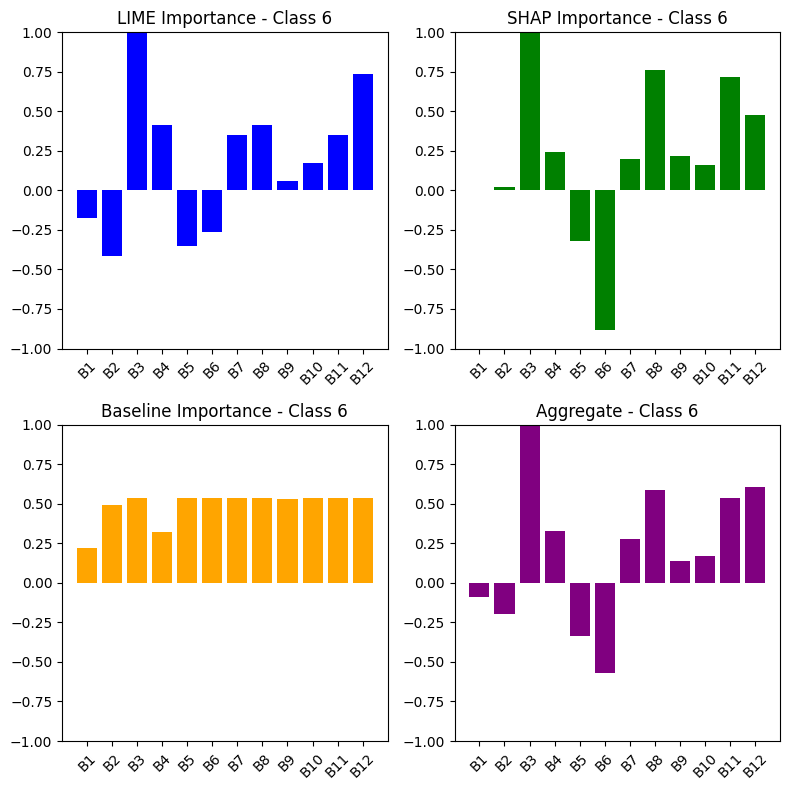

Spearman correlation (Avg vs Baseline): [np.float64(0.5674264393540605), np.float64(0.22377622377622378), np.float64(0.013986013986013986), np.float64(-0.30986683868975945), np.float64(0.3380365512979194), np.float64(-0.12057950662162813), np.float64(0.29123216499055327)]
RBO (Avg vs Baseline): [0.179388, 0.21981599999999993, 0.089694, 0.013121999999999998, 0.31981599999999993, 0.11646899999999996, 0.17916299999999996]
Jaccard Similarity (Avg vs Baseline): [0.6666666666666666, 0.42857142857142855, 0.25, 0.1111111111111111, 0.42857142857142855, 0.25, 0.6666666666666666]
Spearman 0.143 ± 0.277
RBO 0.160 ± 0.091
Jaccard 0.400 ± 0.197

CLASS 7

F1-Base: 0.79

Top bands by LIME:     ['B8', 'B11', 'B9', 'B10', 'B7']
Top bands by SHAP:     ['B8', 'B7', 'B3', 'B12', 'B4']
Top bands by Baseline (low → important): ['B11', 'B3', 'B9', 'B5', 'B7']

Same-Sign Score (LIME vs SHAP):     0.9166666666666666

Spearman correlation (LIME vs SHAP):     0.531
Spearman correlation (LIME vs Baseline): 0.259
S

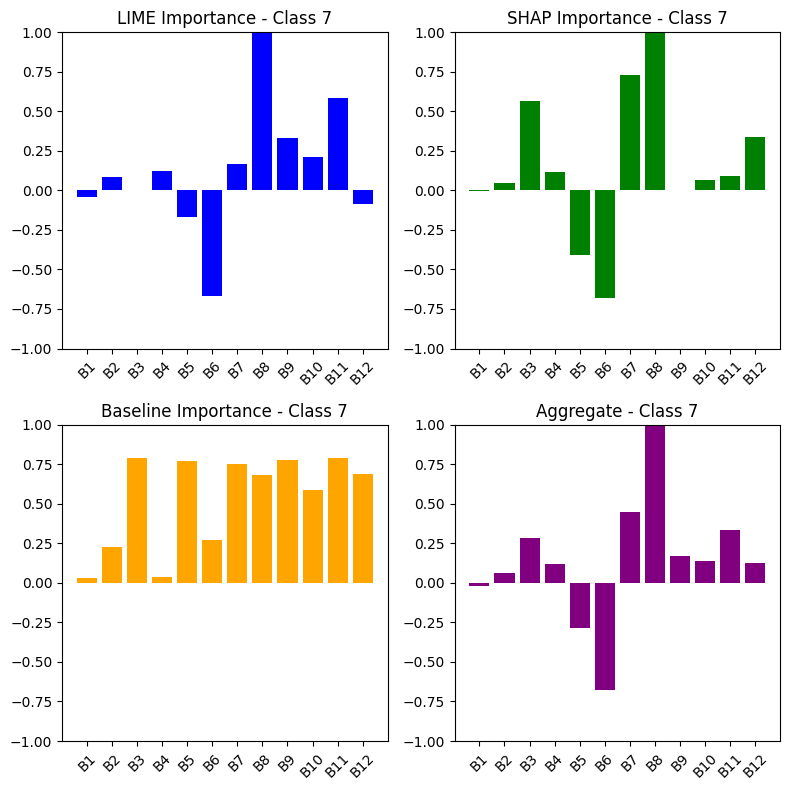

Spearman correlation (Avg vs Baseline): [np.float64(0.5674264393540605), np.float64(0.22377622377622378), np.float64(0.013986013986013986), np.float64(-0.30986683868975945), np.float64(0.3380365512979194), np.float64(-0.12057950662162813), np.float64(0.29123216499055327), np.float64(0.5288974835954515)]
RBO (Avg vs Baseline): [0.179388, 0.21981599999999993, 0.089694, 0.013121999999999998, 0.31981599999999993, 0.11646899999999996, 0.17916299999999996, 0.11593799999999999]
Jaccard Similarity (Avg vs Baseline): [0.6666666666666666, 0.42857142857142855, 0.25, 0.1111111111111111, 0.42857142857142855, 0.25, 0.6666666666666666, 0.6666666666666666]
Spearman 0.192 ± 0.289
RBO 0.154 ± 0.087
Jaccard 0.434 ± 0.204

CLASS 8

F1-Base: 0.81

Top bands by LIME:     ['B2', 'B11', 'B6', 'B4', 'B7']
Top bands by SHAP:     ['B2', 'B8', 'B12', 'B3', 'B7']
Top bands by Baseline (low → important): ['B6', 'B7', 'B3', 'B12', 'B11']

Same-Sign Score (LIME vs SHAP):     0.75

Spearman correlation (LIME vs SHAP):

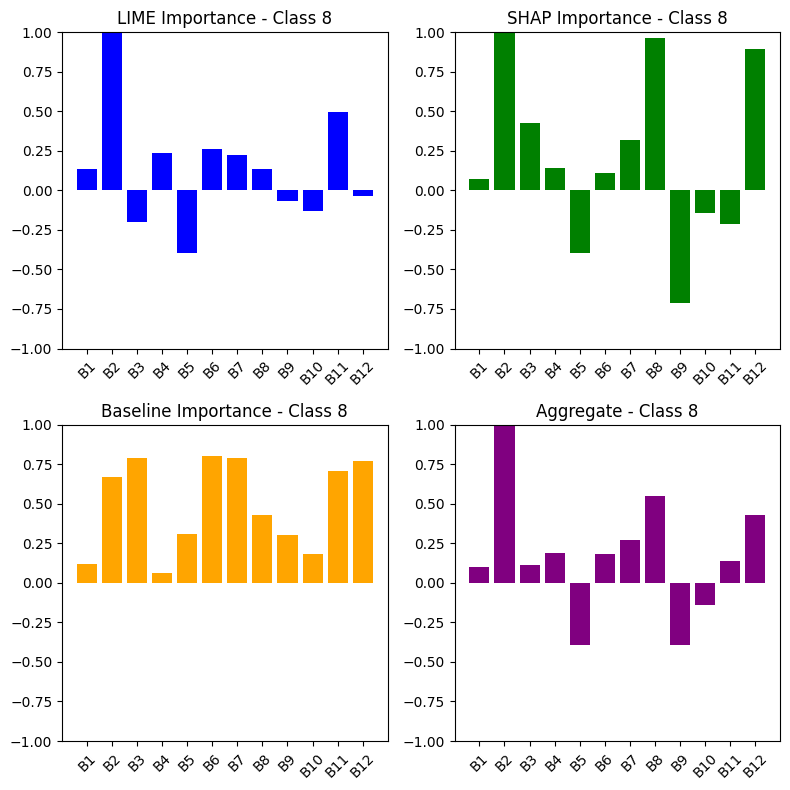

Spearman correlation (Avg vs Baseline): [np.float64(0.5674264393540605), np.float64(0.22377622377622378), np.float64(0.013986013986013986), np.float64(-0.30986683868975945), np.float64(0.3380365512979194), np.float64(-0.12057950662162813), np.float64(0.29123216499055327), np.float64(0.5288974835954515), np.float64(0.35026323416917315)]
RBO (Avg vs Baseline): [0.179388, 0.21981599999999993, 0.089694, 0.013121999999999998, 0.31981599999999993, 0.11646899999999996, 0.17916299999999996, 0.11593799999999999, 0.062694]
Jaccard Similarity (Avg vs Baseline): [0.6666666666666666, 0.42857142857142855, 0.25, 0.1111111111111111, 0.42857142857142855, 0.25, 0.6666666666666666, 0.6666666666666666, 0.25]
Spearman 0.209 ± 0.277
RBO 0.144 ± 0.087
Jaccard 0.413 ± 0.201

CLASS 9

F1-Base: 0.89

Top bands by LIME:     ['B10', 'B3', 'B8', 'B11', 'B2']
Top bands by SHAP:     ['B8', 'B9', 'B7', 'B11', 'B2']
Top bands by Baseline (low → important): ['B8', 'B2', 'B3', 'B12', 'B7']

Same-Sign Score (LIME vs SHAP

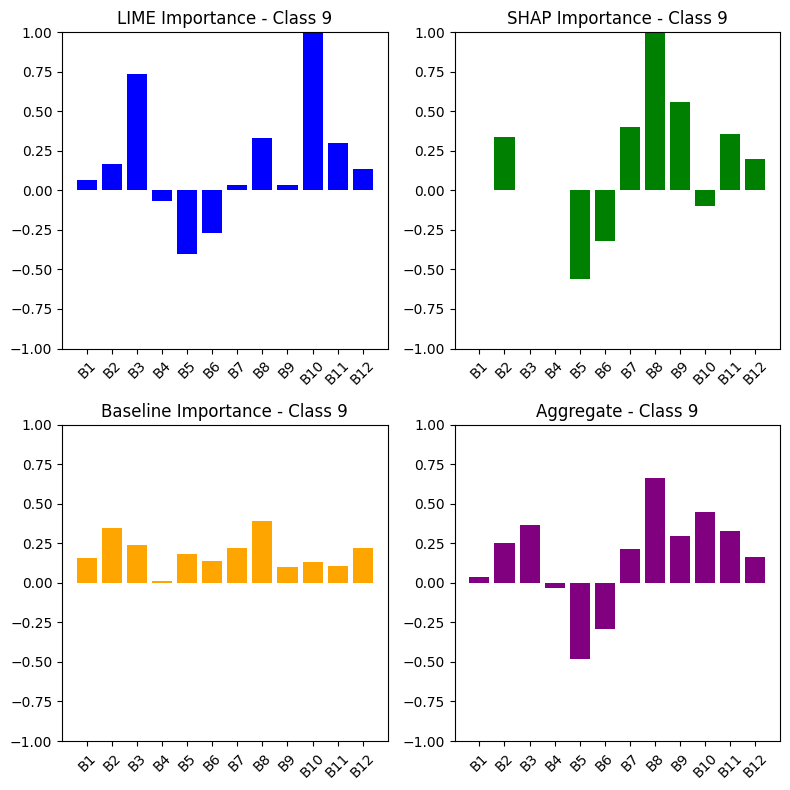

Spearman correlation (Avg vs Baseline): [np.float64(0.5674264393540605), np.float64(0.22377622377622378), np.float64(0.013986013986013986), np.float64(-0.30986683868975945), np.float64(0.3380365512979194), np.float64(-0.12057950662162813), np.float64(0.29123216499055327), np.float64(0.5288974835954515), np.float64(0.35026323416917315), np.float64(0.26970269031026334)]
RBO (Avg vs Baseline): [0.179388, 0.21981599999999993, 0.089694, 0.013121999999999998, 0.31981599999999993, 0.11646899999999996, 0.17916299999999996, 0.11593799999999999, 0.062694, 0.2616939999999999]
Jaccard Similarity (Avg vs Baseline): [0.6666666666666666, 0.42857142857142855, 0.25, 0.1111111111111111, 0.42857142857142855, 0.25, 0.6666666666666666, 0.6666666666666666, 0.25, 0.25]
Spearman 0.215 ± 0.263
RBO 0.156 ± 0.089
Jaccard 0.397 ± 0.197

CLASS 10

F1-Base: 0.98

Top bands by LIME:     ['B2', 'B1', 'B5', 'B4', 'B6']
Top bands by SHAP:     ['B8', 'B7', 'B11', 'B9', 'B12']
Top bands by Baseline (low → important): ['B

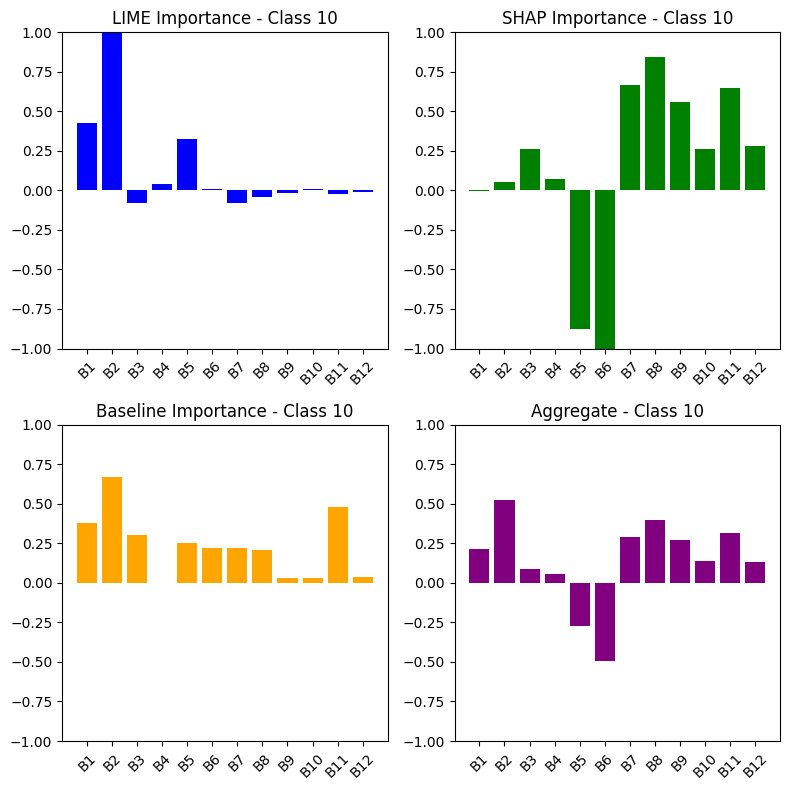

Spearman correlation (Avg vs Baseline): [np.float64(0.5674264393540605), np.float64(0.22377622377622378), np.float64(0.013986013986013986), np.float64(-0.30986683868975945), np.float64(0.3380365512979194), np.float64(-0.12057950662162813), np.float64(0.29123216499055327), np.float64(0.5288974835954515), np.float64(0.35026323416917315), np.float64(0.26970269031026334), np.float64(0.32982659173657675)]
RBO (Avg vs Baseline): [0.179388, 0.21981599999999993, 0.089694, 0.013121999999999998, 0.31981599999999993, 0.11646899999999996, 0.17916299999999996, 0.11593799999999999, 0.062694, 0.2616939999999999, 0.2616939999999999]
Jaccard Similarity (Avg vs Baseline): [0.6666666666666666, 0.42857142857142855, 0.25, 0.1111111111111111, 0.42857142857142855, 0.25, 0.6666666666666666, 0.6666666666666666, 0.25, 0.25, 0.25]
Spearman 0.226 ± 0.253
RBO 0.165 ± 0.090
Jaccard 0.383 ± 0.193

CLASS 11

F1-Base: 0.84

Top bands by LIME:     ['B12', 'B3', 'B4', 'B11', 'B6']
Top bands by SHAP:     ['B11', 'B4', 'B

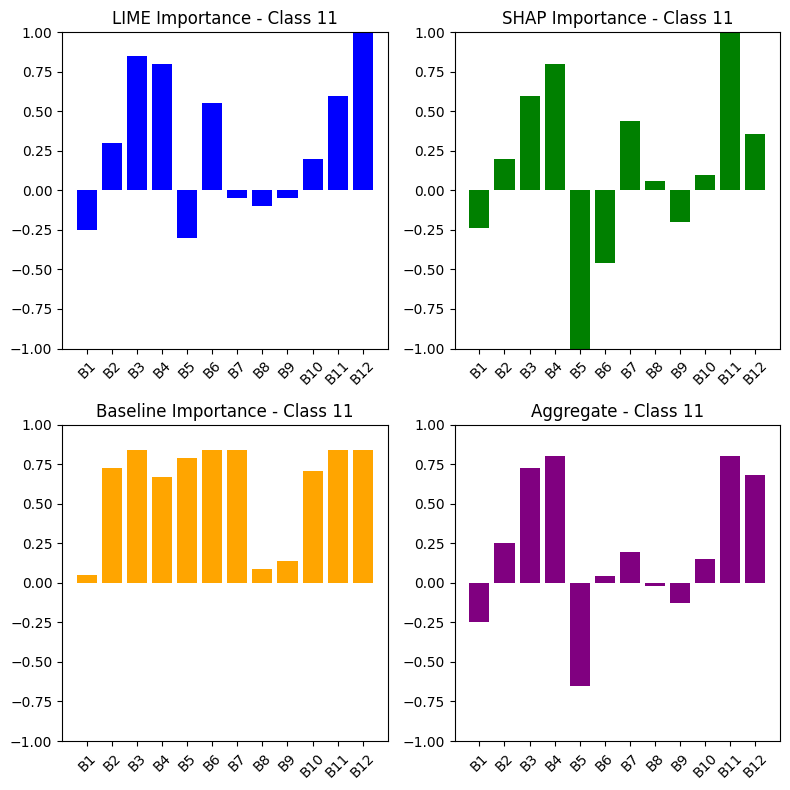

Spearman correlation (Avg vs Baseline): [np.float64(0.5674264393540605), np.float64(0.22377622377622378), np.float64(0.013986013986013986), np.float64(-0.30986683868975945), np.float64(0.3380365512979194), np.float64(-0.12057950662162813), np.float64(0.29123216499055327), np.float64(0.5288974835954515), np.float64(0.35026323416917315), np.float64(0.26970269031026334), np.float64(0.32982659173657675), np.float64(0.49394166352926405)]
RBO (Avg vs Baseline): [0.179388, 0.21981599999999993, 0.089694, 0.013121999999999998, 0.31981599999999993, 0.11646899999999996, 0.17916299999999996, 0.11593799999999999, 0.062694, 0.2616939999999999, 0.2616939999999999, 0.14781599999999998]
Jaccard Similarity (Avg vs Baseline): [0.6666666666666666, 0.42857142857142855, 0.25, 0.1111111111111111, 0.42857142857142855, 0.25, 0.6666666666666666, 0.6666666666666666, 0.25, 0.25, 0.25, 0.42857142857142855]
Spearman 0.248 ± 0.254
RBO 0.164 ± 0.087
Jaccard 0.387 ± 0.185

CLASS 12

F1-Base: 0.73

Top bands by LIME:  

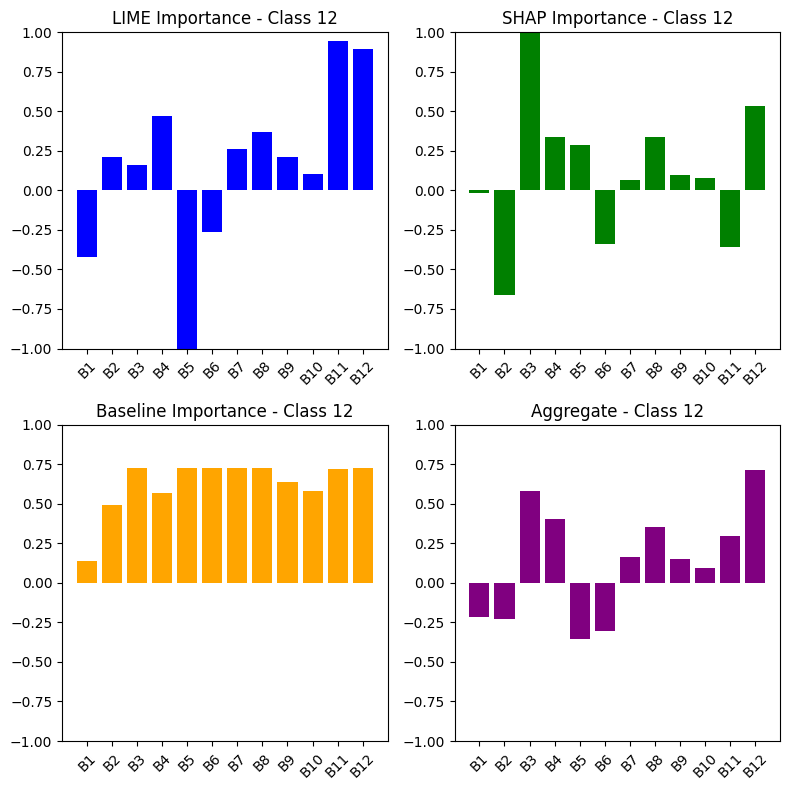

Spearman correlation (Avg vs Baseline): [np.float64(0.5674264393540605), np.float64(0.22377622377622378), np.float64(0.013986013986013986), np.float64(-0.30986683868975945), np.float64(0.3380365512979194), np.float64(-0.12057950662162813), np.float64(0.29123216499055327), np.float64(0.5288974835954515), np.float64(0.35026323416917315), np.float64(0.26970269031026334), np.float64(0.32982659173657675), np.float64(0.49394166352926405), np.float64(0.22393984489839652)]
RBO (Avg vs Baseline): [0.179388, 0.21981599999999993, 0.089694, 0.013121999999999998, 0.31981599999999993, 0.11646899999999996, 0.17916299999999996, 0.11593799999999999, 0.062694, 0.2616939999999999, 0.2616939999999999, 0.14781599999999998, 0.24781599999999995]
Jaccard Similarity (Avg vs Baseline): [0.6666666666666666, 0.42857142857142855, 0.25, 0.1111111111111111, 0.42857142857142855, 0.25, 0.6666666666666666, 0.6666666666666666, 0.25, 0.25, 0.25, 0.42857142857142855, 0.42857142857142855]
Spearman 0.246 ± 0.244
RBO 0.170 ±

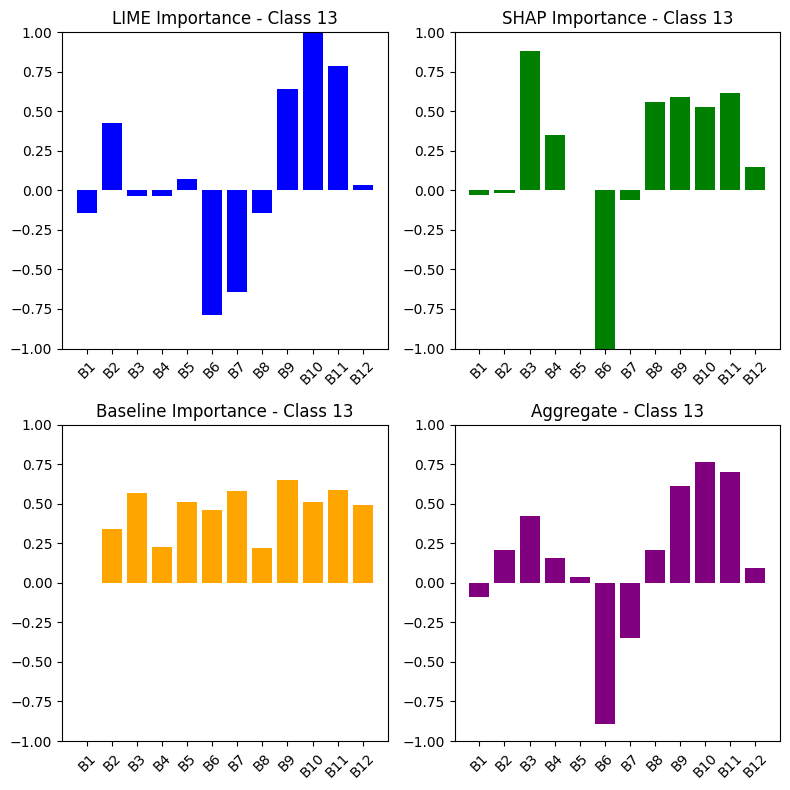

Spearman correlation (Avg vs Baseline): [np.float64(0.5674264393540605), np.float64(0.22377622377622378), np.float64(0.013986013986013986), np.float64(-0.30986683868975945), np.float64(0.3380365512979194), np.float64(-0.12057950662162813), np.float64(0.29123216499055327), np.float64(0.5288974835954515), np.float64(0.35026323416917315), np.float64(0.26970269031026334), np.float64(0.32982659173657675), np.float64(0.49394166352926405), np.float64(0.22393984489839652), np.float64(0.38528955758609046)]
RBO (Avg vs Baseline): [0.179388, 0.21981599999999993, 0.089694, 0.013121999999999998, 0.31981599999999993, 0.11646899999999996, 0.17916299999999996, 0.11593799999999999, 0.062694, 0.2616939999999999, 0.2616939999999999, 0.14781599999999998, 0.24781599999999995, 0.19304099999999996]
Jaccard Similarity (Avg vs Baseline): [0.6666666666666666, 0.42857142857142855, 0.25, 0.1111111111111111, 0.42857142857142855, 0.25, 0.6666666666666666, 0.6666666666666666, 0.25, 0.25, 0.25, 0.42857142857142855, 0

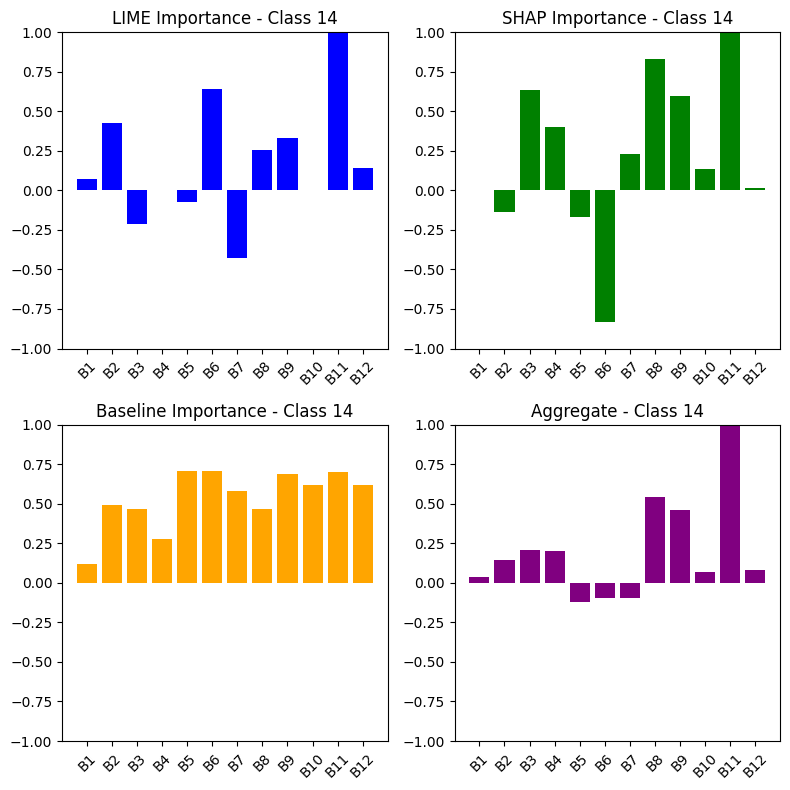

Spearman correlation (Avg vs Baseline): [np.float64(0.5674264393540605), np.float64(0.22377622377622378), np.float64(0.013986013986013986), np.float64(-0.30986683868975945), np.float64(0.3380365512979194), np.float64(-0.12057950662162813), np.float64(0.29123216499055327), np.float64(0.5288974835954515), np.float64(0.35026323416917315), np.float64(0.26970269031026334), np.float64(0.32982659173657675), np.float64(0.49394166352926405), np.float64(0.22393984489839652), np.float64(0.38528955758609046), np.float64(-0.2214442026860475)]
RBO (Avg vs Baseline): [0.179388, 0.21981599999999993, 0.089694, 0.013121999999999998, 0.31981599999999993, 0.11646899999999996, 0.17916299999999996, 0.11593799999999999, 0.062694, 0.2616939999999999, 0.2616939999999999, 0.14781599999999998, 0.24781599999999995, 0.19304099999999996, 0.089694]
Jaccard Similarity (Avg vs Baseline): [0.6666666666666666, 0.42857142857142855, 0.25, 0.1111111111111111, 0.42857142857142855, 0.25, 0.6666666666666666, 0.666666666666666

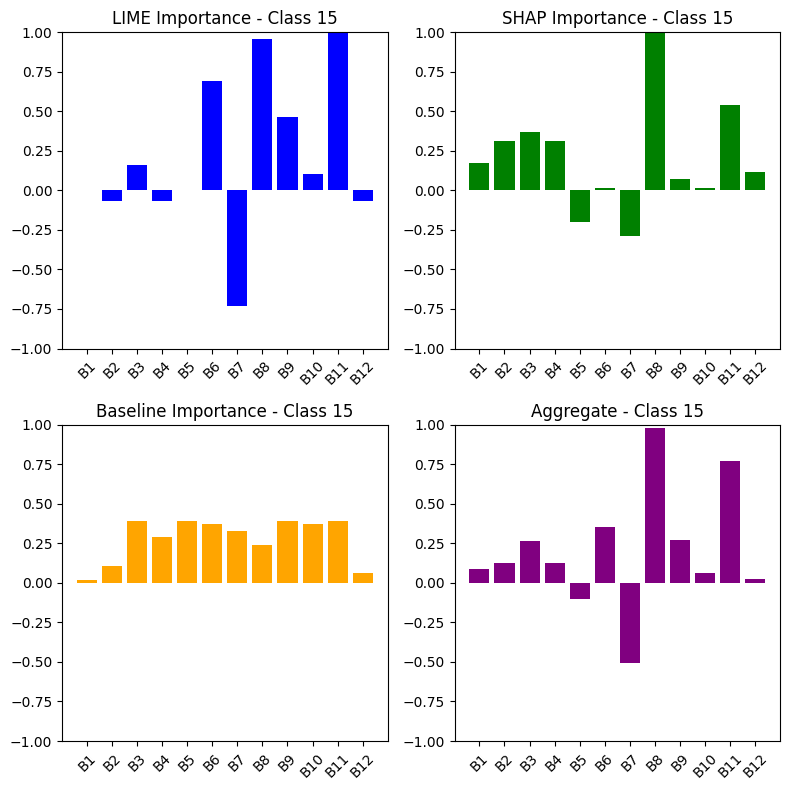

Spearman correlation (Avg vs Baseline): [np.float64(0.5674264393540605), np.float64(0.22377622377622378), np.float64(0.013986013986013986), np.float64(-0.30986683868975945), np.float64(0.3380365512979194), np.float64(-0.12057950662162813), np.float64(0.29123216499055327), np.float64(0.5288974835954515), np.float64(0.35026323416917315), np.float64(0.26970269031026334), np.float64(0.32982659173657675), np.float64(0.49394166352926405), np.float64(0.22393984489839652), np.float64(0.38528955758609046), np.float64(-0.2214442026860475), np.float64(0.21431988791072795)]
RBO (Avg vs Baseline): [0.179388, 0.21981599999999993, 0.089694, 0.013121999999999998, 0.31981599999999993, 0.11646899999999996, 0.17916299999999996, 0.11593799999999999, 0.062694, 0.2616939999999999, 0.2616939999999999, 0.14781599999999998, 0.24781599999999995, 0.19304099999999996, 0.089694, 0.16093799999999997]
Jaccard Similarity (Avg vs Baseline): [0.6666666666666666, 0.42857142857142855, 0.25, 0.1111111111111111, 0.42857142

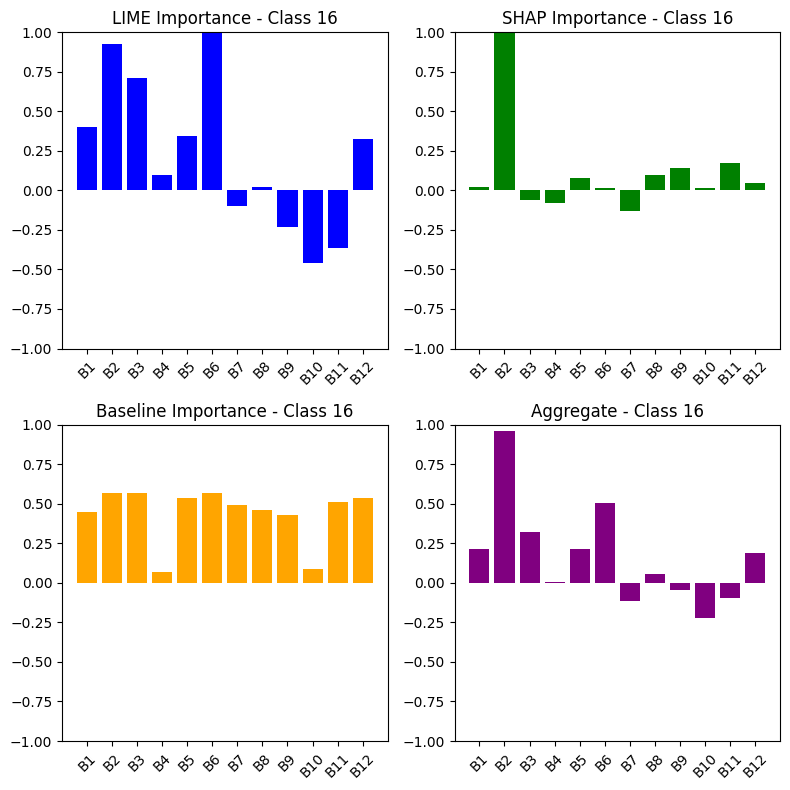

Spearman correlation (Avg vs Baseline): [np.float64(0.5674264393540605), np.float64(0.22377622377622378), np.float64(0.013986013986013986), np.float64(-0.30986683868975945), np.float64(0.3380365512979194), np.float64(-0.12057950662162813), np.float64(0.29123216499055327), np.float64(0.5288974835954515), np.float64(0.35026323416917315), np.float64(0.26970269031026334), np.float64(0.32982659173657675), np.float64(0.49394166352926405), np.float64(0.22393984489839652), np.float64(0.38528955758609046), np.float64(-0.2214442026860475), np.float64(0.21431988791072795), np.float64(0.7160772254706662)]
RBO (Avg vs Baseline): [0.179388, 0.21981599999999993, 0.089694, 0.013121999999999998, 0.31981599999999993, 0.11646899999999996, 0.17916299999999996, 0.11593799999999999, 0.062694, 0.2616939999999999, 0.2616939999999999, 0.14781599999999998, 0.24781599999999995, 0.19304099999999996, 0.089694, 0.16093799999999997, 0.23316299999999995]
Jaccard Similarity (Avg vs Baseline): [0.6666666666666666, 0.42

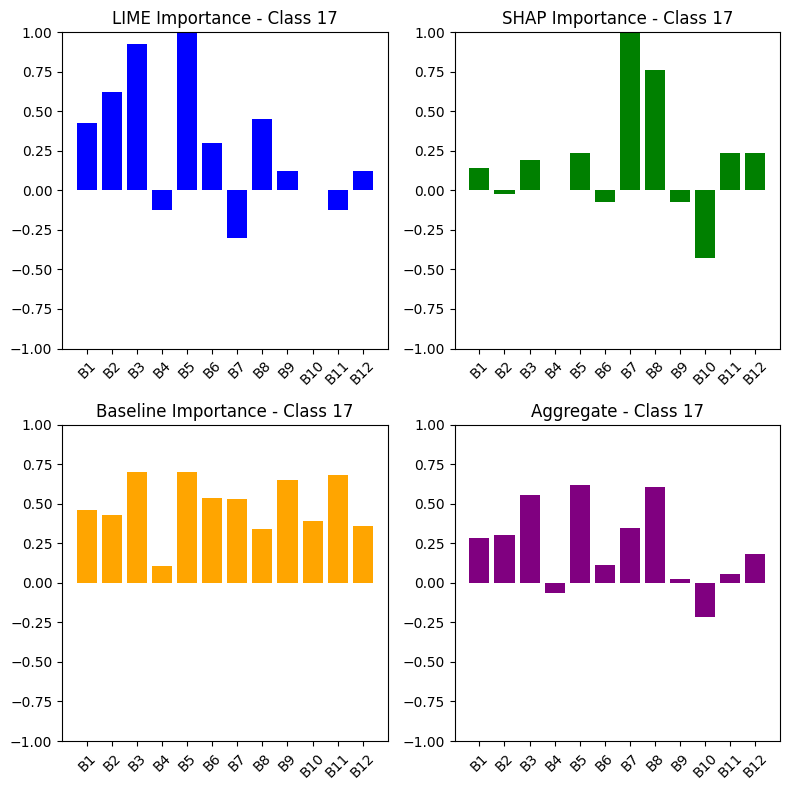

Spearman correlation (Avg vs Baseline): [np.float64(0.5674264393540605), np.float64(0.22377622377622378), np.float64(0.013986013986013986), np.float64(-0.30986683868975945), np.float64(0.3380365512979194), np.float64(-0.12057950662162813), np.float64(0.29123216499055327), np.float64(0.5288974835954515), np.float64(0.35026323416917315), np.float64(0.26970269031026334), np.float64(0.32982659173657675), np.float64(0.49394166352926405), np.float64(0.22393984489839652), np.float64(0.38528955758609046), np.float64(-0.2214442026860475), np.float64(0.21431988791072795), np.float64(0.7160772254706662), np.float64(0.3082316460688724)]
RBO (Avg vs Baseline): [0.179388, 0.21981599999999993, 0.089694, 0.013121999999999998, 0.31981599999999993, 0.11646899999999996, 0.17916299999999996, 0.11593799999999999, 0.062694, 0.2616939999999999, 0.2616939999999999, 0.14781599999999998, 0.24781599999999995, 0.19304099999999996, 0.089694, 0.16093799999999997, 0.23316299999999995, 0.16169399999999995]
Jaccard Si

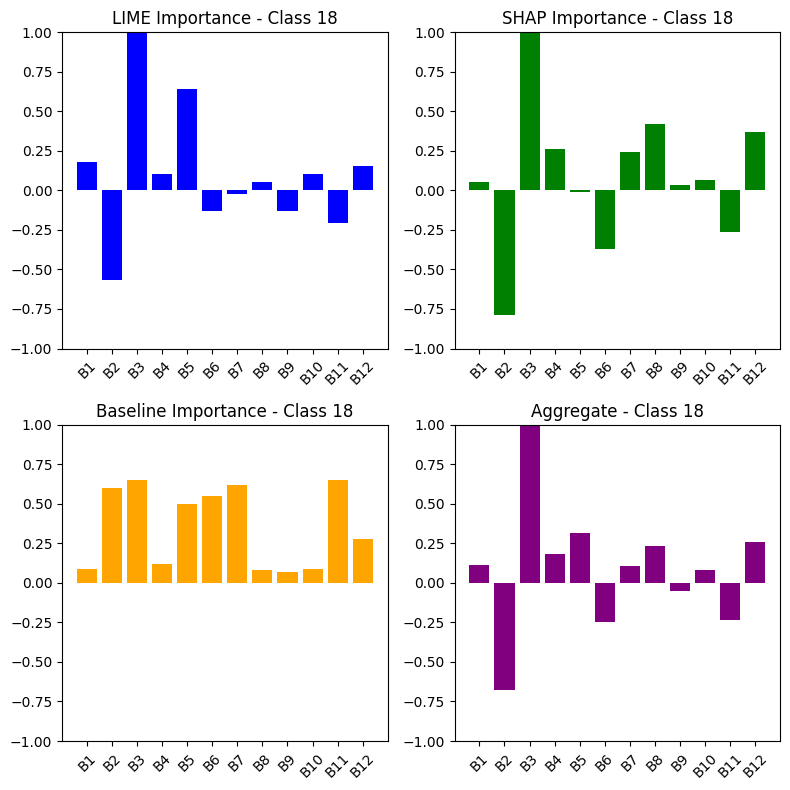

Spearman correlation (Avg vs Baseline): [np.float64(0.5674264393540605), np.float64(0.22377622377622378), np.float64(0.013986013986013986), np.float64(-0.30986683868975945), np.float64(0.3380365512979194), np.float64(-0.12057950662162813), np.float64(0.29123216499055327), np.float64(0.5288974835954515), np.float64(0.35026323416917315), np.float64(0.26970269031026334), np.float64(0.32982659173657675), np.float64(0.49394166352926405), np.float64(0.22393984489839652), np.float64(0.38528955758609046), np.float64(-0.2214442026860475), np.float64(0.21431988791072795), np.float64(0.7160772254706662), np.float64(0.3082316460688724), np.float64(-0.059649489994912826)]
RBO (Avg vs Baseline): [0.179388, 0.21981599999999993, 0.089694, 0.013121999999999998, 0.31981599999999993, 0.11646899999999996, 0.17916299999999996, 0.11593799999999999, 0.062694, 0.2616939999999999, 0.2616939999999999, 0.14781599999999998, 0.24781599999999995, 0.19304099999999996, 0.089694, 0.16093799999999997, 0.233162999999999

In [ ]:
import numpy as np
from scipy.stats import spearmanr, kendalltau
import matplotlib.pyplot as plt
import rbo
import seaborn as sns

# Band labels
bands = [f'B{i+1}' for i in range(12)]

f1_base = [0.88, 0.85, 0.89, 0.67, 0.73, 0.58, 0.54, 0.79, 0.81, 0.89,
           0.98, 0.84, 0.73, 0.67, 0.71, 0.39, 0.57, 0.70, 0.68]

sign_score_lime_shaps = []

spearmanrs_lime_shaps = []
spearmanrs_lime_base = []
spearmanrs_shap_base = []

rbo_lime_shaps = []

jaccard_top5_lime_shap = []

avg_plots_lime_shaps = []

# Arrays to store metrics between avg_baseline
spearman_list = []
rbo_list = []
jaccard_list = []

# kendalls_lime_shaps = []
# kendalls_lime_base = []
# kendalls_shap_base = []

# Dữ liệu cho nhiều class
all_lime = [
    [-0.03, -0.1, 0.095, 0.03, -0.15, -0.05, 0.2, 0.25, 0.07, -0.06, -0.08, 0.12],
    [0.02, 0.07, -0.07, 0.005, -0.05, -0.02, 0.001, 0.11, 0.08, -0.01, 0.09, -0.045],
    [0.01, 0.02, -0.01, 0.01, -0.01, 0.06, 0.005, 0.07, 0.01, -0.02, 0.01, -0.005],
    [0.002, 0.003, -0.004, 0.013, 0.012, -0.007, -0.008, 0.012, 0.011, 0.002, 0.014, -0.0025],
    [0.035, 0.001, -0.09, 0.02, 0.001, -0.005, -0.03, 0.10, 0.11, -0.02, 0.14, -0.14],
    [0.005, -0.005, 0.012, 0.005, -0.005, 0.0, 0.002, 0.017, 0.005, 0.002, 0.006, 0.006],
    [-0.003, -0.007, 0.017, 0.007, -0.006, -0.0045, 0.006, 0.007, 0.001, 0.003, 0.006, 0.0125],
    [-0.005, 0.01, 0.0005, 0.015, -0.02, -0.08, 0.02, 0.12, 0.04, 0.025, 0.07, -0.01],
    [0.01, 0.0755, -0.015, 0.018, -0.03, 0.02, 0.017, 0.01, -0.005, -0.01, 0.0375, -0.0025],

    [0.01, 0.025, 0.11, -0.01, -0.06, -0.04, 0.005, 0.05, 0.005, 0.15, 0.045, 0.02],
    [0.21, 0.49, -0.04, 0.02, 0.16, 0.005, -0.04, -0.02, -0.009, 0.005, -0.01, -0.005],
    [-0.005, 0.006, 0.017, 0.016, -0.006, 0.011, -0.001, -0.002, -0.001, 0.004, 0.012, 0.02],
    [-0.008, 0.004, 0.003, 0.009, -0.019, -0.005, 0.005, 0.007, 0.004, 0.002, 0.018, 0.017],
    [-0.02, 0.06, -0.005, -0.005, 0.01, -0.11, -0.09, -0.02, 0.09, 0.14, 0.11, 0.005],
    [0.005, 0.03, -0.015, 0.0, -0.005, 0.045, -0.03, 0.018, 0.023, 0.0, 0.07, 0.01],
    [0.0, -0.005, 0.012, -0.005, 0.0, 0.052, -0.055, 0.072, 0.035, 0.008, 0.0751, -0.005],
    [0.021, 0.048, 0.037, 0.005, 0.018, 0.052, -0.005, 0.001, -0.012, -0.024, -0.019, 0.017],
    [0.017, 0.025, 0.037, -0.005, 0.04, 0.012, -0.012, 0.018, 0.005, 0.0, -0.005, 0.005],
    [0.07, -0.22, 0.39, 0.04, 0.25, -0.05, -0.01, 0.02, -0.05, 0.04, -0.08, 0.06]
    # Add more
]
all_shap = [
    [-0.07, -0.06, 0.48, 0.13, -0.13, -0.3, 0.4, 0.19, -0.12, 0.075, -0.08, 0.31],
    [0.04, -0.03, 0.14, 0.05, 0.03, -0.33, -0.02, 0.31, 0.2, 0.06, 0.03, 0.29],
    [-0.02, -0.15, 0.38, 0.085, 0.001, -0.37, -0.21, 0.27, 0.37, 0.15, 0.4, -0.05],
    [-0.0001, -0.01, 0.28, 0.08, -0.06, -0.18, 0.13, 0.25, -0.0015, -0.02, 0.05, 0.1],
    [-0.05, -0.16, 0.3, 0.14, -0.12, -0.42, 0.05, 0.28, 0.26, 0.18, 0.65, -0.25],
    [-0.01, -0.015, 0.29, 0.08, -0.03, -0.26, 0.09, 0.25, 0.01, 0.07, 0.03, 0.16],
    [0.0, 0.005, 0.25, 0.06, -0.08, -0.22, 0.05, 0.19, 0.055, 0.04, 0.18, 0.12],
    [-0.001, 0.02, 0.25, 0.05, -0.18, -0.3, 0.32, 0.44, 0.0005, 0.03, 0.04, 0.15],
    [0.02, 0.28, 0.12, 0.04, -0.11, 0.03, 0.09, 0.27, -0.2, -0.04, -0.06, 0.25],

    [0.001, 0.17, 0.001, 0.0005, -0.28, -0.16, 0.2, 0.5, 0.28, -0.05, 0.18, 0.1],
    [-0.002, 0.03, 0.15, 0.04, -0.5, -0.57, 0.38, 0.48, 0.32, 0.15, 0.37, 0.16],
    [-0.12, 0.1, 0.3, 0.4, -0.5, -0.23, 0.22, 0.03, -0.1, 0.05, 0.5, 0.18],
    [-0.01, -0.41, 0.62, 0.21, 0.18, -0.21, 0.04, 0.21, 0.06, 0.05, -0.22, 0.33],
    [-0.01, -0.005, 0.3, 0.12, 0.0, -0.34, -0.02, 0.19, 0.2, 0.18, 0.21, 0.05],
    [0.0, -0.04, 0.19, 0.12, -0.05, -0.25, 0.07, 0.25, 0.18, 0.04, 0.3, 0.005],
    [0.06, 0.11, 0.13, 0.11, -0.07, 0.005, -0.1, 0.35, 0.025, 0.005, 0.19, 0.04],
    [0.015, 0.63, -0.04, -0.05, 0.05, 0.01, -0.08, 0.06, 0.09, 0.01, 0.11, 0.03],
    [0.06, -0.01, 0.08, 0.0, 0.1, -0.03, 0.42, 0.32, -0.03, -0.18, 0.1, 0.1],
    [0.05, -0.75, 0.95, 0.25, -0.01, -0.35, 0.23, 0.4, 0.03, 0.06, -0.25, 0.35]
    # Add more
]
all_baseline = [
    [0.87, 0.76, 0.02, 0.79, 0.72, 0.69, 0.24, 0.49, 0.68, 0.79, 0.6, 0.15],
    [0.72, 0.56, 0.39, 0.78, 0.51, 0.18, 0.06, 0.02, 0.0, 0.41, 0.29, 0.47],
    [0.86, 0.67, 0.06, 0.88, 0.17, 0.00, 0.07, 0.34, 0.02, 0.79, 0.38, 0.48],
    [0.58, 0.26, 0.00, 0.54, 0.00, 0.00, 0.01, 0.32, 0.14, 0.19, 0.08, 0.07],
    [0.63, 0.33, 0.32, 0.47, 0.17, 0.01, 0.00, 0.14, 0.00, 0.31, 0.00, 0.37],
    [0.49, 0.15, 0.00, 0.41, 0.00, 0.00, 0.02, 0.04, 0.04, 0.04, 0.03, 0.08],
    [0.32, 0.05, 0.0, 0.22, 0.0, 0.0, 0.0, 0.0, 0.01, 0.0, 0.0, 0.0],
    [0.76, 0.56, 0.0, 0.75, 0.02, 0.52, 0.04, 0.11, 0.01, 0.2, 0.0, 0.1],
    [0.69, 0.14, 0.02, 0.75, 0.5, 0.01, 0.02, 0.38, 0.51, 0.63, 0.1, 0.04],

    [0.73, 0.54, 0.65, 0.88, 0.71, 0.75, 0.67, 0.5, 0.79, 0.76, 0.78, 0.67],
    [0.6, 0.31, 0.68, 0.98, 0.73, 0.76, 0.76, 0.77, 0.95, 0.95, 0.5, 0.94],
    [0.79, 0.11, 0.0, 0.17, 0.05, 0.0, 0.0, 0.75, 0.7, 0.13, 0.0, 0.0],
    [0.59, 0.24, 0.0, 0.16, 0.0, 0.0, 0.0, 0.0, 0.09, 0.15, 0.01, 0.0],
    [0.67, 0.33, 0.1, 0.44, 0.16, 0.21, 0.09, 0.45, 0.02, 0.16, 0.08, 0.18],
    [0.59, 0.22, 0.24, 0.43, 0.0, 0.0, 0.13, 0.24, 0.02, 0.09, 0.01, 0.09],
    [0.37, 0.28, 0.0, 0.1, 0.0, 0.02, 0.06, 0.15, 0.0, 0.02, 0.0, 0.33],
    [0.12, 0.0, 0.0, 0.5, 0.03, 0.0, 0.08, 0.11, 0.14, 0.48, 0.06, 0.03],
    [0.24, 0.27, 0.0, 0.59, 0.0, 0.16, 0.17, 0.36, 0.05, 0.31, 0.02, 0.34],
    [0.59, 0.08, 0.03, 0.56, 0.18, 0.13, 0.06, 0.6, 0.61, 0.59, 0.03, 0.4]
    # Add more
]

# ======================== Hàm phụ ========================
def top_k_indices(values, k=5, reverse=True):
    return np.argsort(values)[::-1 if reverse else 1][:k]

def jaccard_similarity(list1, list2):
    set1, set2 = set(list1), set(list2)
    return len(set1 & set2) / len(set1 | set2)

def same_sign_score(arr1, arr2):
    score = 0
    for a, b in zip(arr1, arr2):
        if a == 0 or b == 0:
            continue
        if (a > 0 and b > 0) or (a < 0 and b < 0):
            score += 1
    return score/12
def normalize_to_neg1_pos1(arr):
    max_abs = np.max(np.abs(arr))
    if max_abs == 0:
        return arr  # tránh chia 0
    return arr / max_abs


intersection_ratios = []
baseline_importances = []
# ======================== Vòng lặp các class ========================
for i, (lime_importance, shap_importance, baseline_importance) in enumerate(zip(all_lime, all_shap, all_baseline), start=0):
    print("="*80)
    print(f"\nCLASS {i}")
    print(f"\nF1-Base: {f1_base[i]}")

    baseline_importance = [f1_base[i] - val for val in baseline_importance]
    baseline_importances.append(baseline_importance)

    # Top-K band names
    top_lime_idx = top_k_indices(lime_importance)
    top_shap_idx = top_k_indices(shap_importance)
    top_base_idx = top_k_indices(baseline_importance)

    top_lime = [bands[j] for j in top_lime_idx]
    top_shap = [bands[j] for j in top_shap_idx]
    top_base = [bands[j] for j in top_base_idx]

    print(f"\nTop bands by LIME:     {top_lime}")
    print(f"Top bands by SHAP:     {top_shap}")
    print(f"Top bands by Baseline (low → important): {top_base}")

    # Same-sign score
    sign_score_lime_shap = same_sign_score(lime_importance, shap_importance)
    sign_score_lime_shaps.append(sign_score_lime_shap)
    print(f"\nSame-Sign Score (LIME vs SHAP):     {sign_score_lime_shap}")

    # Tính Spearman
    rho_lime_shap, _ = spearmanr(lime_importance, shap_importance)
    rho_lime_base, _ = spearmanr(lime_importance, baseline_importance)
    rho_shap_base, _ = spearmanr(shap_importance, baseline_importance)

    spearmanrs_lime_shaps.append(rho_lime_shap)
    spearmanrs_lime_base.append(rho_lime_base)
    spearmanrs_shap_base.append(rho_shap_base)

    print(f"\nSpearman correlation (LIME vs SHAP):     {rho_lime_shap:.3f}")
    print(f"Spearman correlation (LIME vs Baseline): {rho_lime_base:.3f}")
    print(f"Spearman correlation (SHAP vs Baseline): {rho_shap_base:.3f}")

    # RBO
    rbo_lime_shap = rbo.RankingSimilarity(top_lime, top_shap).rbo(p=0.9)
    rbo_lime_base = rbo.RankingSimilarity(top_lime, top_base).rbo(p=0.9)
    rbo_shap_base = rbo.RankingSimilarity(top_shap, top_base).rbo(p=0.9)
    rbo_lime_shaps.append(rbo_lime_shap)

    print(f"\nRBO (LIME vs SHAP):     {rbo_lime_shap:.3f}")
    print(f"RBO (LIME vs Baseline): {rbo_lime_base:.3f}")
    print(f"RBO (SHAP vs Baseline): {rbo_shap_base:.3f}")

    # Tính tỉ số Baseline ∩ (LIME ∪ SHAP)
    union_lime_shap = set(top_lime) | set(top_shap)
    intersect_base_union = set(top_base) & union_lime_shap
    ratio_intersect_over_union = len(intersect_base_union) / len(union_lime_shap)
    print(f"\nIntersection Ratio (Baseline ∩ (LIME ∪ SHAP)): {ratio_intersect_over_union:.3f}")
    intersection_ratios.append(ratio_intersect_over_union)
    # Jaccard
    jac_lime_shap = jaccard_similarity(top_lime, top_shap)
    jac_lime_base = jaccard_similarity(top_lime, top_base)
    jac_shap_base = jaccard_similarity(top_shap, top_base)

    jaccard_top5_lime_shap.append(jac_lime_shap)

    print(f"\nJaccard Similarity (LIME vs SHAP):     {jac_lime_shap:.3f}")
    print(f"Jaccard Similarity (LIME vs Baseline): {jac_lime_base:.3f}")
    print(f"Jaccard Similarity (SHAP vs Baseline): {jac_shap_base:.3f}")

    # -------------------------------- Visualization --------------------------------
    x = np.arange(len(bands))
    all_values = lime_importance + shap_importance + baseline_importance
    y_min = min(all_values) - 0.1
    y_max = max(all_values) + 0.1

    plt.figure(figsize=(8, 8))

    # Subplot 1
    plt.subplot(2, 2, 1)
    plt.bar(x, normalize_to_neg1_pos1(lime_importance), color='blue')
    plt.xticks(x, bands, rotation=45)
    plt.title(f'LIME Importance - Class {i}')
    plt.ylim(-1, 1)

    # Subplot 2
    plt.subplot(2, 2, 2)
    plt.bar(x, normalize_to_neg1_pos1(shap_importance), color='green')
    plt.xticks(x, bands, rotation=45)
    plt.title(f'SHAP Importance - Class {i}')
    plt.ylim(-1, 1)

    # Subplot 3
    plt.subplot(2, 2, 3)
    plt.bar(x, baseline_importance, color='orange')
    plt.xticks(x, bands, rotation=45)
    plt.title(f'Baseline Importance - Class {i}')
    plt.ylim(-1, 1)

    # Subplot 4
    avg_plot = (normalize_to_neg1_pos1(lime_importance) + normalize_to_neg1_pos1(shap_importance)) / 2
    avg_plots_lime_shaps.append(avg_plot)
    plt.subplot(2, 2, 4)
    plt.bar(x, avg_plot, color='purple')
    plt.xticks(x, bands, rotation=45)
    plt.title(f'Aggregate - Class {i}')
    plt.ylim(-1, 1)

    plt.tight_layout()
    plt.show()

        # Metrics for Avg Plot vs Baseline
    rho_avg_base, _ = spearmanr(avg_plot, baseline_importance)
    rbo_avg_base = rbo.RankingSimilarity(
        [bands[j] for j in top_k_indices(avg_plot)],
        top_base
    ).rbo(p=0.9)
    jac_avg_base = jaccard_similarity(
        [bands[j] for j in top_k_indices(avg_plot)],
        top_base
    )

    spearman_list.append(rho_avg_base)
    rbo_list.append(rbo_avg_base)
    jaccard_list.append(jac_avg_base)

    print(f"Spearman correlation (Avg vs Baseline): {spearman_list}")
    print(f"RBO (Avg vs Baseline): {rbo_list}")
    print(f"Jaccard Similarity (Avg vs Baseline): {jaccard_list}")
    print("Spearman {:.3f} ± {:.3f}".format(np.mean(spearman_list), np.std(spearman_list)))
    print("RBO {:.3f} ± {:.3f}".format(np.mean(rbo_list), np.std(rbo_list)))
    print("Jaccard {:.3f} ± {:.3f}".format(np.mean(jaccard_list), np.std(jaccard_list)))



In [ ]:
print(sign_score_lime_shaps)
print(spearmanrs_lime_shaps)
print(rbo_lime_shaps)
print(intersection_ratios)
print(jaccard_top5_lime_shap)

print("Same-Sign: {:.3f} ± {:.3f}".format(np.mean(sign_score_lime_shaps), np.std(sign_score_lime_shaps)))
print("Spearman: {:.3f} ± {:.3f}".format(np.mean(spearmanrs_lime_shaps), np.std(spearmanrs_lime_shaps)))
print("RBO: {:.3f} ± {:.3f}".format(np.mean(rbo_lime_shaps), np.std(rbo_lime_shaps)))
print("IR: {:.3f} ± {:.3f}".format(np.mean(intersection_ratios), np.std(intersection_ratios)))
print("Jaccard: {:.3f} ± {:.3f}".format(np.mean(jaccard_top5_lime_shap), np.std(jaccard_top5_lime_shap)))

[0.8333333333333334, 0.5, 0.4166666666666667, 0.3333333333333333, 0.5, 0.8333333333333334, 0.8333333333333334, 0.9166666666666666, 0.75, 0.8333333333333334, 0.25, 0.75, 0.75, 0.5833333333333334, 0.4166666666666667, 0.5833333333333334, 0.5833333333333334, 0.4166666666666667, 0.75]
[np.float64(0.6923076923076924), np.float64(0.1015763379090602), np.float64(-0.18898463931497736), np.float64(-0.07017587058225039), np.float64(0.43082377802808297), np.float64(0.7823609321902906), np.float64(0.8736895887490174), np.float64(0.5314685314685316), np.float64(0.32924744011902274), np.float64(0.3368421052631579), np.float64(-0.7697727177969431), np.float64(0.6900185713132712), np.float64(0.1368421052631579), np.float64(0.5578981711288905), np.float64(0.014010529366766925), np.float64(0.43186449496099977), np.float64(-0.04553422044199251), np.float64(-0.023009173911856542), np.float64(0.6210564546529159)]
[0.22438799999999998, 0.2616939999999999, 0.062694, 0.07146899999999999, 0.29304099999999994, 0

In [ ]:
print((avg_plots_lime_shaps))

[array([-0.13291667, -0.2625    ,  0.69      ,  0.19541667, -0.43541667,
       -0.4125    ,  0.81666667,  0.69791667,  0.015     , -0.041875  ,
       -0.24333333,  0.56291667]), array([ 0.15151515,  0.27272727, -0.10606061,  0.09848485, -0.18181818,
       -0.59090909, -0.02575758,  0.96969697,  0.66666667,  0.04545455,
        0.45454545,  0.23484848]), array([ 0.04642857, -0.04464286,  0.40357143,  0.17767857, -0.07017857,
       -0.03392857, -0.22678571,  0.8375    ,  0.53392857,  0.04464286,
        0.57142857, -0.09821429]), array([ 0.07125   ,  0.08928571,  0.35714286,  0.60714286,  0.32142857,
       -0.57142857, -0.05357143,  0.875     ,  0.39017857,  0.03571429,
        0.58928571,  0.08928571]), array([ 0.08653846, -0.11950549, -0.09065934,  0.17912088, -0.08873626,
       -0.34093407, -0.06868132,  0.57252747,  0.59285714,  0.06703297,
        1.        , -0.69230769]), array([ 0.12981744, -0.17292089,  0.85294118,  0.28498986, -0.19878296,
       -0.44827586,  0.21399594,

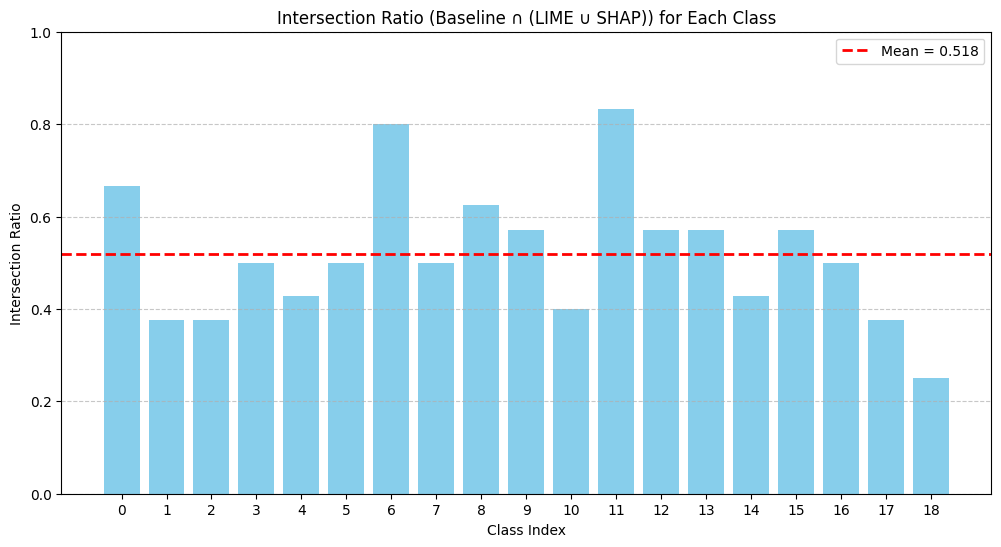

In [ ]:

mean_val = np.mean(intersection_ratios)

plt.figure(figsize=(12, 6))
plt.bar(range(len(intersection_ratios)), intersection_ratios, color='skyblue')
plt.axhline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_val:.3f}')  # Đường trung bình
plt.xlabel('Class Index')
plt.ylabel('Intersection Ratio')
plt.title('Intersection Ratio (Baseline ∩ (LIME ∪ SHAP)) for Each Class')
plt.xticks(range(len(intersection_ratios)))
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

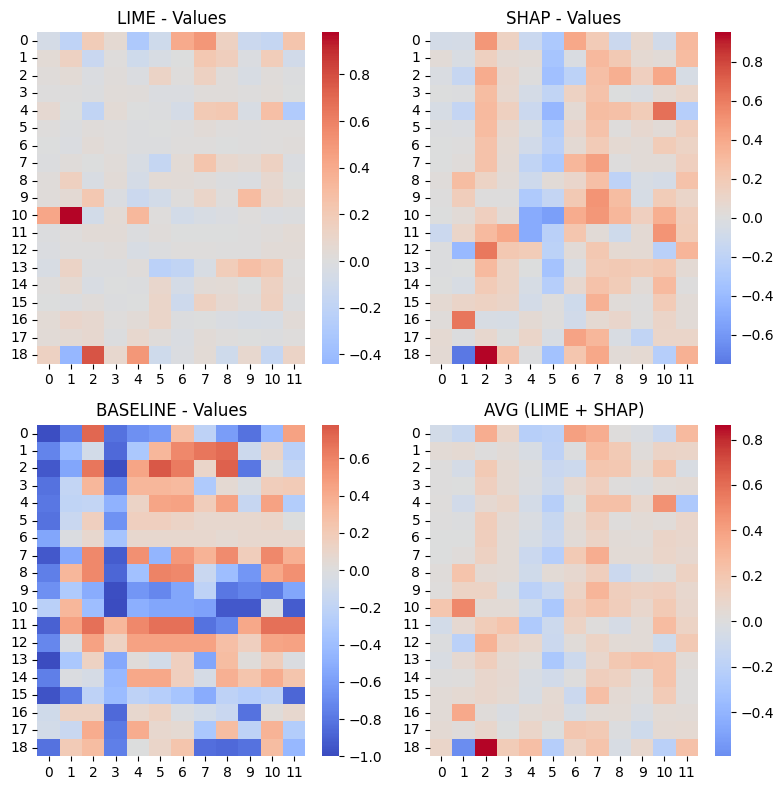

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Scale LIME cho dễ nhìn
all_lime_scaled = np.array([[val * 2 for val in row] for row in all_lime])

# Tính trung bình LIME + SHAP
avg_plot = (all_lime_scaled + all_shap) / 2

# Tạo figure 2x2
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# Heatmap 1: LIME
sns.heatmap(all_lime_scaled, annot=False, cmap="coolwarm", center=0, ax=axes[0,0])
axes[0,0].set_title("LIME - Values")

# Heatmap 2: SHAP
sns.heatmap(all_shap, annot=False, cmap="coolwarm", center=0, ax=axes[0,1])
axes[0,1].set_title("SHAP - Values")

# Heatmap 3: BASELINE
all_baseline_norm = np.array(baseline_importances)*2 -1
sns.heatmap(all_baseline_norm, annot=False, cmap="coolwarm", center=0, ax=axes[1,0])
axes[1,0].set_title("BASELINE - Values")

# Heatmap 4: AVG (LIME + SHAP)
sns.heatmap(avg_plot, annot=False, cmap="coolwarm", center=0, ax=axes[1,1])
axes[1,1].set_title("AVG (LIME + SHAP)")

plt.tight_layout()
plt.show()


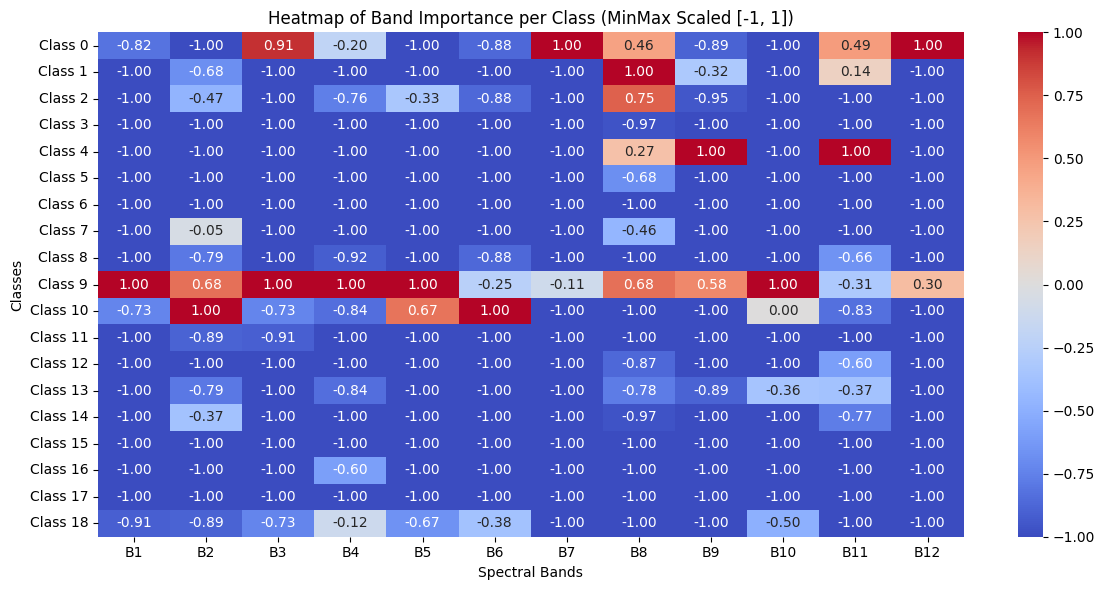

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# 1. Tạo mảng dữ liệu (19 classes x 12 bands)
data = np.array([
    [0.02, 0.00, 0.21, 0.10, 0.00, 0.01, 0.65, 0.46, 0.02, 0.00, 0.26, 0.69],
    [0.00, 0.03, 0.00, 0.00, 0.00, 0.00, 0.00, 0.63, 0.13, 0.00, 0.20, 0.00],
    [0.00, 0.05, 0.00, 0.03, 0.02, 0.01, 0.00, 0.55, 0.01, 0.00, 0.00, 0.00],
    [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.01, 0.00, 0.00, 0.00, 0.00],
    [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.40, 0.38, 0.00, 0.35, 0.00],
    [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.10, 0.00, 0.00, 0.00, 0.00],
    [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    [0.00, 0.09, 0.00, 0.00, 0.00, 0.00, 0.00, 0.17, 0.00, 0.00, 0.00, 0.00],
    [0.00, 0.02, 0.00, 0.01, 0.00, 0.01, 0.00, 0.00, 0.00, 0.00, 0.06, 0.00],
    [0.22, 0.16, 0.22, 0.25, 0.06, 0.06, 0.29, 0.53, 0.30, 0.28, 0.12, 0.45],
    [0.03, 0.19, 0.03, 0.02, 0.05, 0.16, 0.00, 0.00, 0.00, 0.14, 0.03, 0.00],
    [0.00, 0.01, 0.01, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.04, 0.00, 0.00, 0.07, 0.00],
    [0.00, 0.02, 0.00, 0.02, 0.00, 0.00, 0.00, 0.07, 0.02, 0.09, 0.11, 0.00],
    [0.00, 0.06, 0.00, 0.00, 0.00, 0.00, 0.00, 0.01, 0.00, 0.00, 0.04, 0.00],
    [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    [0.00, 0.00, 0.00, 0.05, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    [0.01, 0.01, 0.03, 0.11, 0.01, 0.05, 0.00, 0.00, 0.00, 0.07, 0.00, 0.00]
])

# 2. Chuẩn hóa bằng MinMaxScaler về [-1, 1]
scaler = MinMaxScaler(feature_range=(-1, 1))
data_scaled = scaler.fit_transform(data)

# 3. Vẽ heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data_scaled, annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels=[f"B{i+1}" for i in range(12)],
            yticklabels=[f"Class {i}" for i in range(19)])
plt.title("Heatmap of Band Importance per Class (MinMax Scaled [-1, 1])")
plt.xlabel("Spectral Bands")
plt.ylabel("Classes")
plt.tight_layout()
plt.show()


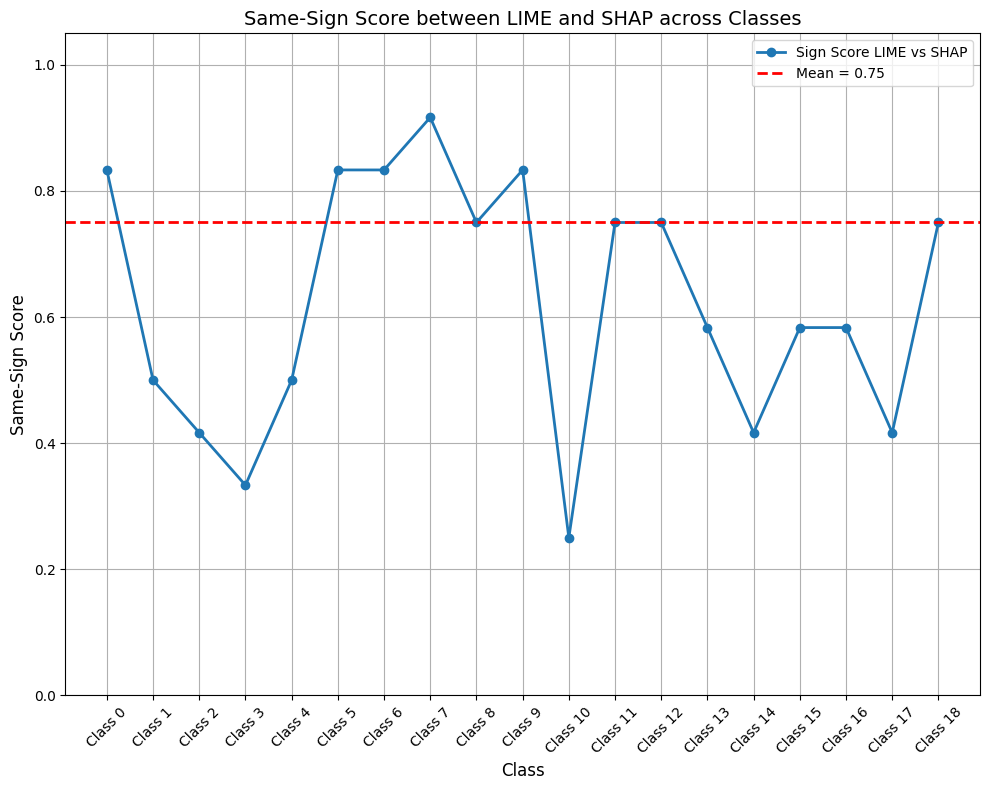

In [ ]:
import matplotlib.pyplot as plt

# Tạo danh sách tên class: "Class 0" đến "Class 18"
classes = [f"Class {i}" for i in range(len(sign_score_lime_shaps))]

# Tính mean
mean_score = np.mean(sign_score_lime_shap)

# Vẽ biểu đồ đường
plt.figure(figsize=(10, 8))
plt.plot(classes, sign_score_lime_shaps, marker='o', linestyle='-', linewidth=2, label="Sign Score LIME vs SHAP")

# Vẽ đường ngang thể hiện mean
plt.axhline(mean_score, color='red', linestyle='--', linewidth=2, label=f"Mean = {mean_score:.2f}")

# Gán nhãn, tiêu đề, v.v.
plt.title("Same-Sign Score between LIME and SHAP across Classes", fontsize=14)
plt.xlabel("Class", fontsize=12)
plt.ylabel("Same-Sign Score", fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Hiển thị
plt.show()

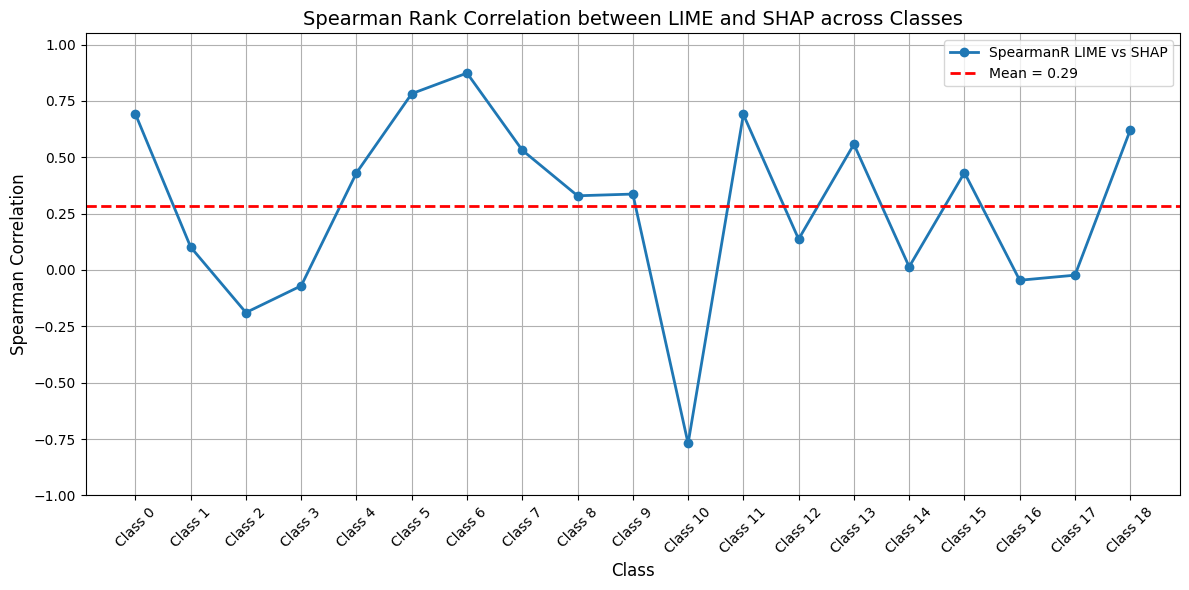

In [ ]:
classes = [f"Class {i}" for i in range(len(spearmanrs_lime_shaps))]

# Tính mean
mean_score = np.mean(spearmanrs_lime_shaps)

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(classes, spearmanrs_lime_shaps, marker='o', linestyle='-', linewidth=2, label="SpearmanR LIME vs SHAP")

# Vẽ đường mean
plt.axhline(mean_score, color='red', linestyle='--', linewidth=2, label=f"Mean = {mean_score:.2f}")

# Cài đặt đồ thị
plt.title("Spearman Rank Correlation between LIME and SHAP across Classes", fontsize=14)
plt.xlabel("Class", fontsize=12)
plt.ylabel("Spearman Correlation", fontsize=12)
plt.xticks(rotation=45)
plt.ylim(-1, 1.05)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Hiển thị
plt.show()

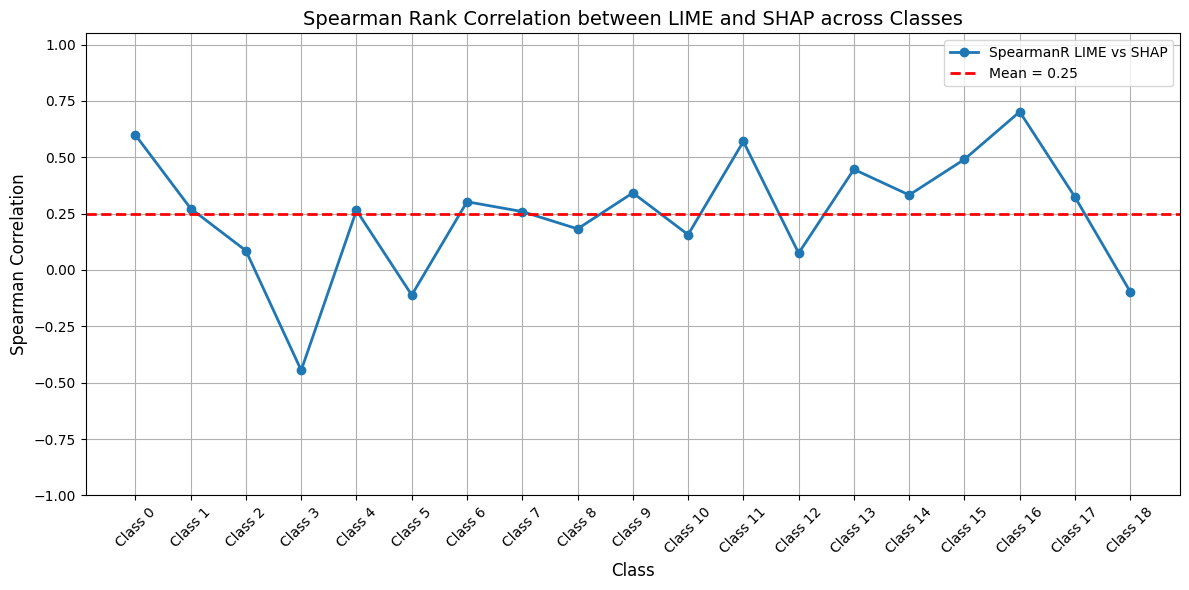

In [ ]:
classes = [f"Class {i}" for i in range(len(spearmanrs_lime_base))]

# Tính mean
mean_score = np.mean(spearmanrs_lime_base)

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(classes, spearmanrs_lime_base, marker='o', linestyle='-', linewidth=2, label="SpearmanR LIME vs SHAP")

# Vẽ đường mean
plt.axhline(mean_score, color='red', linestyle='--', linewidth=2, label=f"Mean = {mean_score:.2f}")

# Cài đặt đồ thị
plt.title("Spearman Rank Correlation between LIME and SHAP across Classes", fontsize=14)
plt.xlabel("Class", fontsize=12)
plt.ylabel("Spearman Correlation", fontsize=12)
plt.xticks(rotation=45)
plt.ylim(-1, 1.05)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Hiển thị
plt.show()

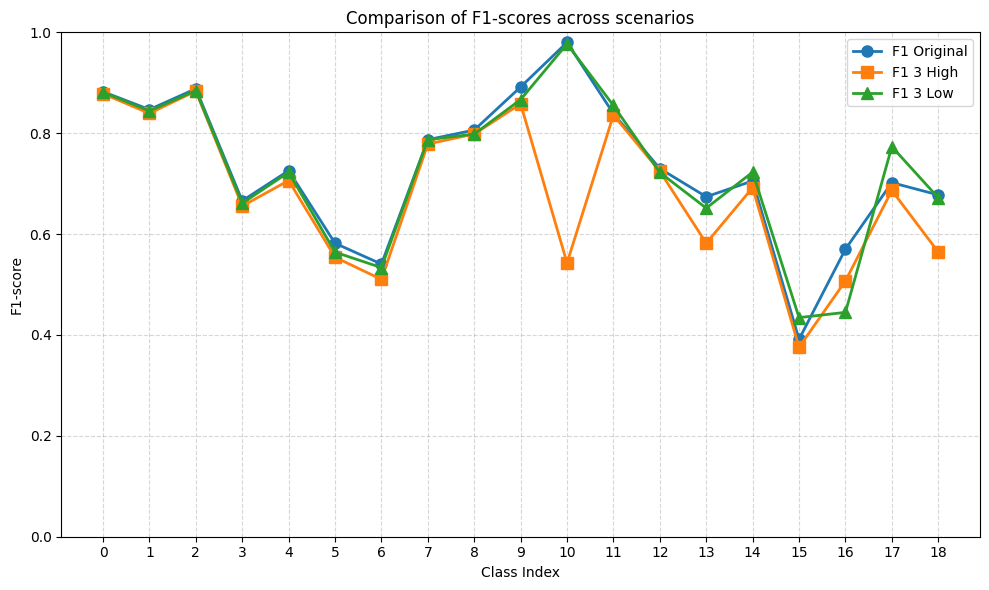

In [ ]:
import matplotlib.pyplot as plt

# Index 0-18
indices = list(range(19))

# F1-scores
f1_high = [0.878306, 0.839268, 0.883562, 0.655554, 0.706191, 0.554080,
           0.510204, 0.778631, 0.798266, 0.858300, 0.542741, 0.836025,
           0.724494, 0.582031, 0.692047, 0.375546, 0.507087, 0.686567, 0.564516]

f1_original = [0.882258, 0.846933, 0.888202, 0.665966, 0.725683, 0.581794,
               0.540541, 0.787199, 0.806274, 0.891752, 0.980108, 0.838764,
               0.729873, 0.674043, 0.705387, 0.391304, 0.570108, 0.701987, 0.677686]

f1_low = [0.881274, 0.844149, 0.884522, 0.661142, 0.722576, 0.564174,
          0.533471, 0.787067, 0.798342, 0.866696, 0.977042, 0.854946,
          0.722160, 0.651501, 0.722813, 0.434426, 0.444822, 0.773333, 0.672000]

# Plot
plt.figure(figsize=(10,6))
plt.plot(indices, f1_original, marker='o', linewidth=2, markersize=8, label='F1 Original')
plt.plot(indices, f1_high, marker='s', linewidth=2, markersize=8, label='F1 3 High')
plt.plot(indices, f1_low, marker='^', linewidth=2, markersize=8, label='F1 3 Low')


plt.xlabel('Class Index')
plt.ylabel('F1-score')
plt.title('Comparison of F1-scores across scenarios')
plt.xticks(indices)
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


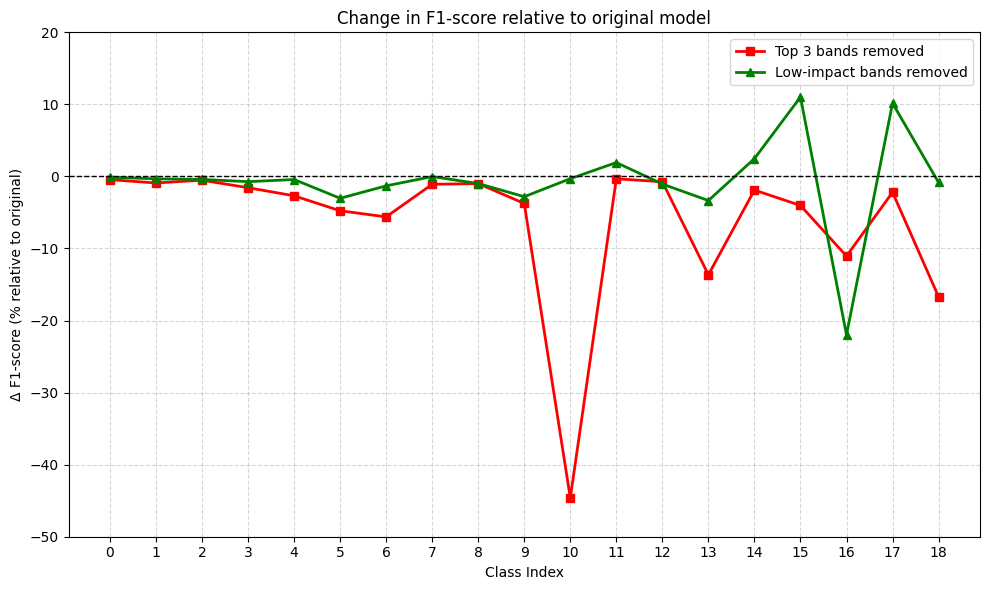

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Index 0-18
indices = list(range(19))

# F1-scores
f1_original = np.array([0.882258, 0.846933, 0.888202, 0.665966, 0.725683, 0.581794,
                        0.540541, 0.787199, 0.806274, 0.891752, 0.980108, 0.838764,
                        0.729873, 0.674043, 0.705387, 0.391304, 0.570108, 0.701987, 0.677686])

f1_high = np.array([0.878306, 0.839268, 0.883562, 0.655554, 0.706191, 0.554080,
                    0.510204, 0.778631, 0.798266, 0.858300, 0.542741, 0.836025,
                    0.724494, 0.582031, 0.692047, 0.375546, 0.507087, 0.686567, 0.564516])

f1_low = np.array([0.881274, 0.844149, 0.884522, 0.661142, 0.722576, 0.564174,
                   0.533471, 0.787067, 0.798342, 0.866696, 0.977042, 0.854946,
                   0.722160, 0.651501, 0.722813, 0.434426, 0.444822, 0.773333, 0.672000])

# Chuẩn hóa % so với gốc và trừ 100 để origin=0
percent_high = (f1_high / f1_original * 100) - 100
percent_low  = (f1_low / f1_original * 100) - 100

# Vẽ đồ thị
plt.figure(figsize=(10,6))
plt.plot(indices, percent_high, marker='s', color='red', linewidth=2, label='Top 3 bands removed')
plt.plot(indices, percent_low, marker='^', color='green', linewidth=2, label='Low-impact bands removed')

plt.axhline(0, color='black', linestyle='--', linewidth=1)  # origin
plt.xlabel('Class Index')
plt.ylabel('Δ F1-score (% relative to original)')
plt.title('Change in F1-score relative to original model')
plt.xticks(indices)
plt.ylim(-50, 20)  # điều chỉnh trục y để thấy rõ giảm/ tăng
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
!pip install rbo


CLASS 0

F1-Base: 0.88

Top bands by LIME:     ['B4', 'B7', 'B8', 'B12', 'B5']
Top bands by SHAP:     ['B5', 'B4', 'B8', 'B3', 'B12']

Same-Sign Score (LIME vs SHAP):     0.9166666666666666

Spearman correlation (LIME vs SHAP):     0.839

RBO (LIME vs SHAP):     0.188

Jaccard Similarity (LIME vs SHAP):     0.667


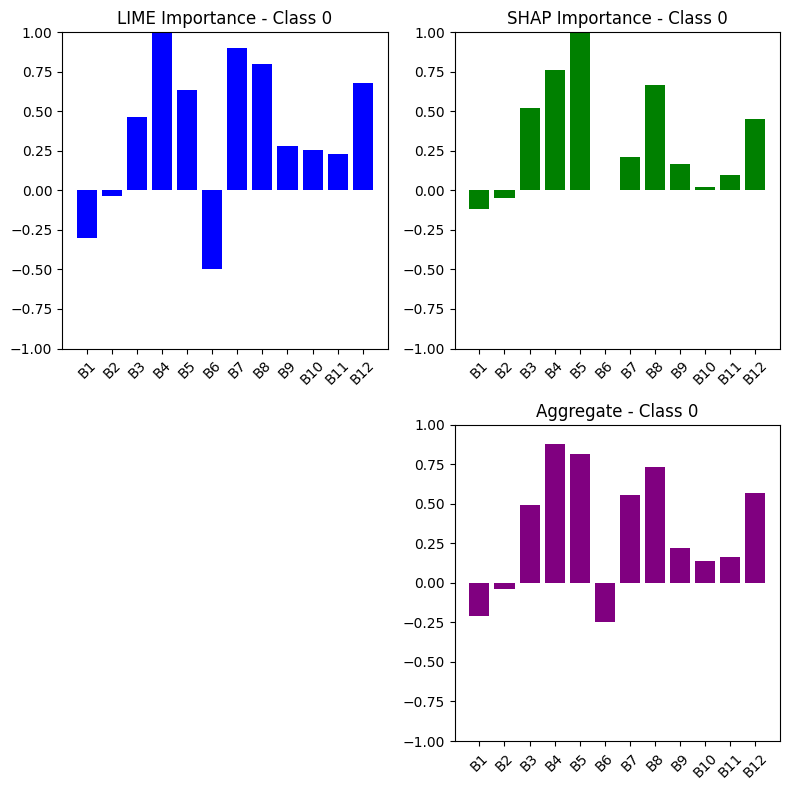

Spearman correlation (Avg vs Baseline): []
RBO (Avg vs Baseline): []
Jaccard Similarity (Avg vs Baseline): []
Spearman nan ± nan
RBO nan ± nan
Jaccard nan ± nan

CLASS 1

F1-Base: 0.85

Top bands by LIME:     ['B11', 'B8', 'B4', 'B12', 'B3']
Top bands by SHAP:     ['B11', 'B8', 'B7', 'B4', 'B12']

Same-Sign Score (LIME vs SHAP):     0.8333333333333334

Spearman correlation (LIME vs SHAP):     0.809

RBO (LIME vs SHAP):     0.351

Jaccard Similarity (LIME vs SHAP):     0.667


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:218: RuntimeWarning: Degrees of freedom <= 0 for slice
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:175: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:210: RuntimeWarning: invalid value encountered in scalar divide


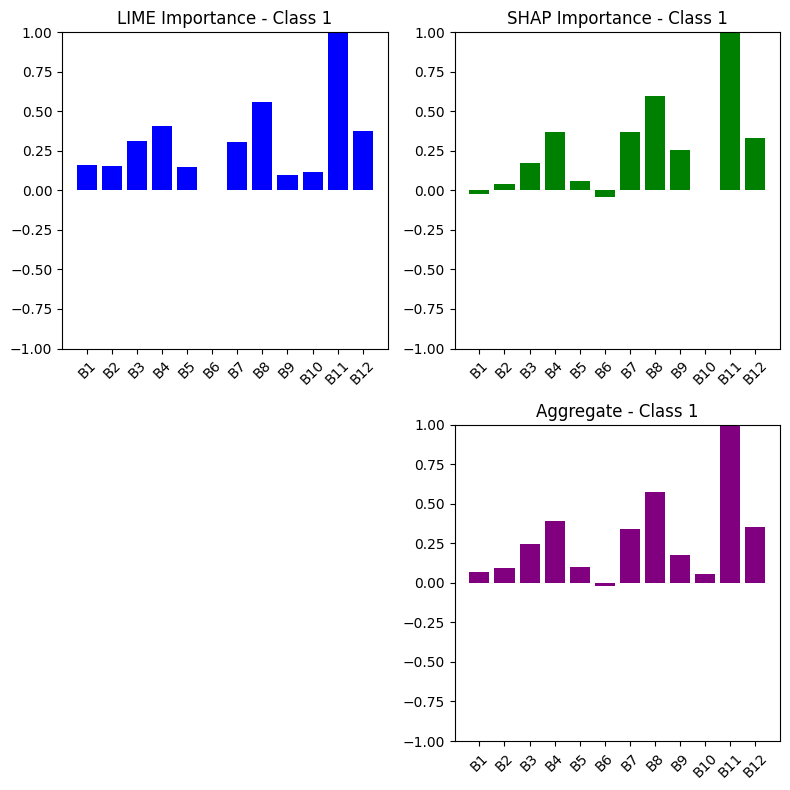

Spearman correlation (Avg vs Baseline): []
RBO (Avg vs Baseline): []
Jaccard Similarity (Avg vs Baseline): []
Spearman nan ± nan
RBO nan ± nan
Jaccard nan ± nan

CLASS 2

F1-Base: 0.89

Top bands by LIME:     ['B10', 'B7', 'B4', 'B11', 'B12']
Top bands by SHAP:     ['B11', 'B8', 'B12', 'B4', 'B5']

Same-Sign Score (LIME vs SHAP):     0.9166666666666666

Spearman correlation (LIME vs SHAP):     -0.182

RBO (LIME vs SHAP):     0.076

Jaccard Similarity (LIME vs SHAP):     0.429


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:218: RuntimeWarning: Degrees of freedom <= 0 for slice
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:175: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:210: RuntimeWarning: invalid value encountered in scalar divide


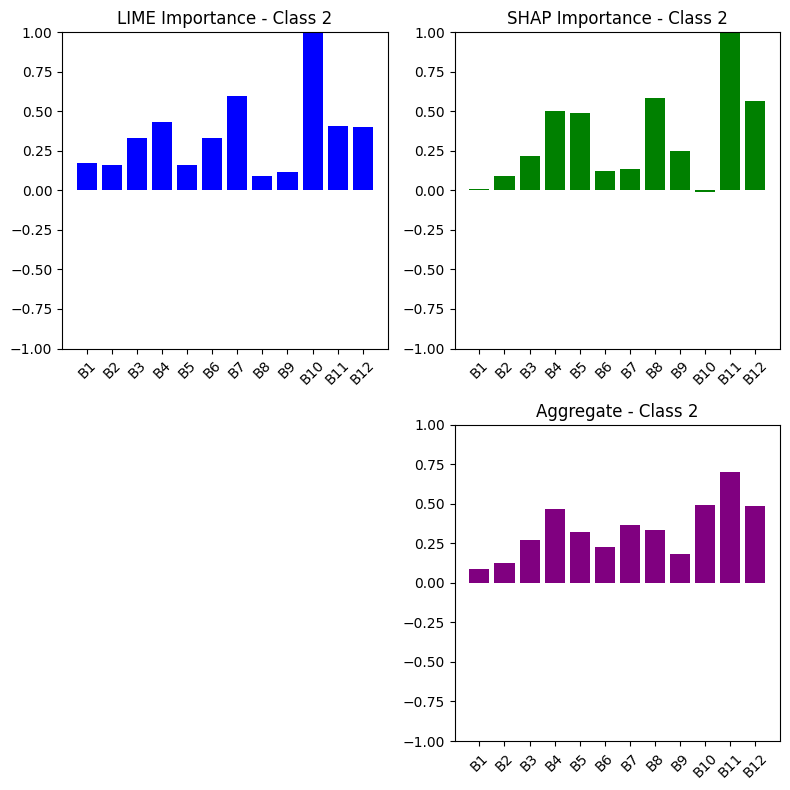

Spearman correlation (Avg vs Baseline): []
RBO (Avg vs Baseline): []
Jaccard Similarity (Avg vs Baseline): []
Spearman nan ± nan
RBO nan ± nan
Jaccard nan ± nan

CLASS 3

F1-Base: 0.67

Top bands by LIME:     ['B11', 'B3', 'B4', 'B5', 'B8']
Top bands by SHAP:     ['B8', 'B11', 'B4', 'B5', 'B9']

Same-Sign Score (LIME vs SHAP):     0.8333333333333334

Spearman correlation (LIME vs SHAP):     0.706

RBO (LIME vs SHAP):     0.206

Jaccard Similarity (LIME vs SHAP):     0.667


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:218: RuntimeWarning: Degrees of freedom <= 0 for slice
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:175: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:210: RuntimeWarning: invalid value encountered in scalar divide


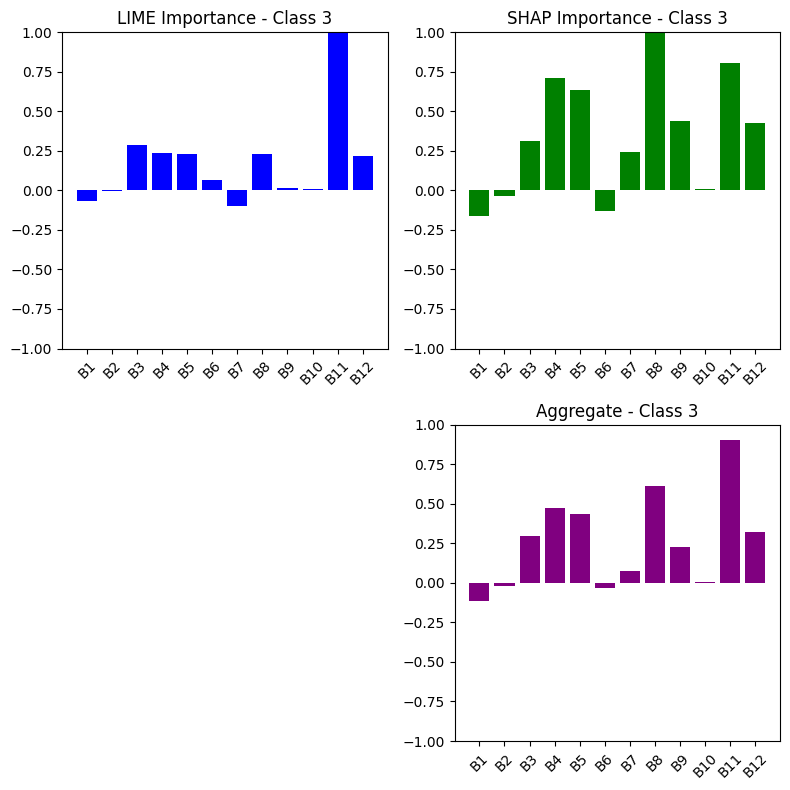

Spearman correlation (Avg vs Baseline): []
RBO (Avg vs Baseline): []
Jaccard Similarity (Avg vs Baseline): []
Spearman nan ± nan
RBO nan ± nan
Jaccard nan ± nan

CLASS 4

F1-Base: 0.73

Top bands by LIME:     ['B11', 'B3', 'B8', 'B4', 'B12']
Top bands by SHAP:     ['B8', 'B11', 'B7', 'B4', 'B9']

Same-Sign Score (LIME vs SHAP):     0.75

Spearman correlation (LIME vs SHAP):     0.623

RBO (LIME vs SHAP):     0.193

Jaccard Similarity (LIME vs SHAP):     0.429


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:218: RuntimeWarning: Degrees of freedom <= 0 for slice
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:175: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:210: RuntimeWarning: invalid value encountered in scalar divide


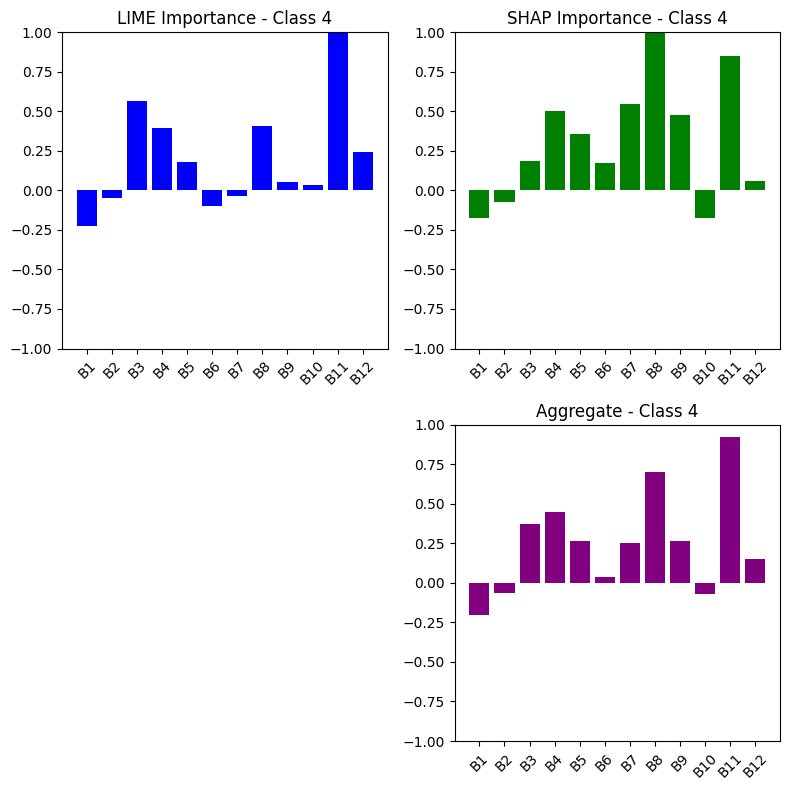

Spearman correlation (Avg vs Baseline): []
RBO (Avg vs Baseline): []
Jaccard Similarity (Avg vs Baseline): []
Spearman nan ± nan
RBO nan ± nan
Jaccard nan ± nan

CLASS 5

F1-Base: 0.58

Top bands by LIME:     ['B5', 'B3', 'B12', 'B4', 'B8']
Top bands by SHAP:     ['B8', 'B5', 'B4', 'B7', 'B11']

Same-Sign Score (LIME vs SHAP):     0.9166666666666666

Spearman correlation (LIME vs SHAP):     0.774

RBO (LIME vs SHAP):     0.148

Jaccard Similarity (LIME vs SHAP):     0.429


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:218: RuntimeWarning: Degrees of freedom <= 0 for slice
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:175: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:210: RuntimeWarning: invalid value encountered in scalar divide


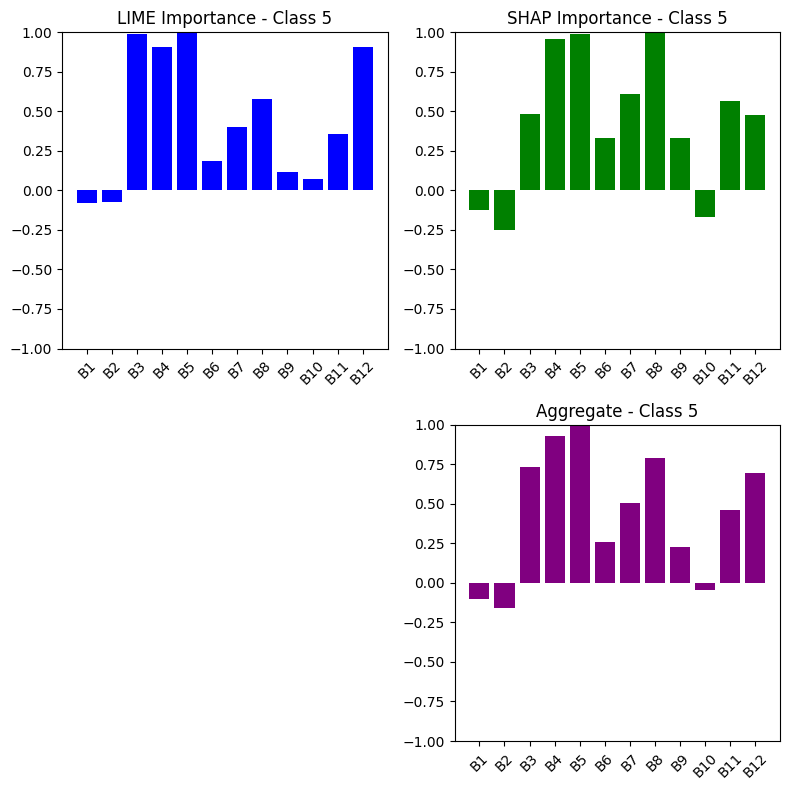

Spearman correlation (Avg vs Baseline): []
RBO (Avg vs Baseline): []
Jaccard Similarity (Avg vs Baseline): []
Spearman nan ± nan
RBO nan ± nan
Jaccard nan ± nan

CLASS 6

F1-Base: 0.54

Top bands by LIME:     ['B4', 'B5', 'B12', 'B3', 'B8']
Top bands by SHAP:     ['B5', 'B4', 'B8', 'B12', 'B3']

Same-Sign Score (LIME vs SHAP):     0.8333333333333334

Spearman correlation (LIME vs SHAP):     0.907

RBO (LIME vs SHAP):     0.264

Jaccard Similarity (LIME vs SHAP):     1.000


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:218: RuntimeWarning: Degrees of freedom <= 0 for slice
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:175: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:210: RuntimeWarning: invalid value encountered in scalar divide


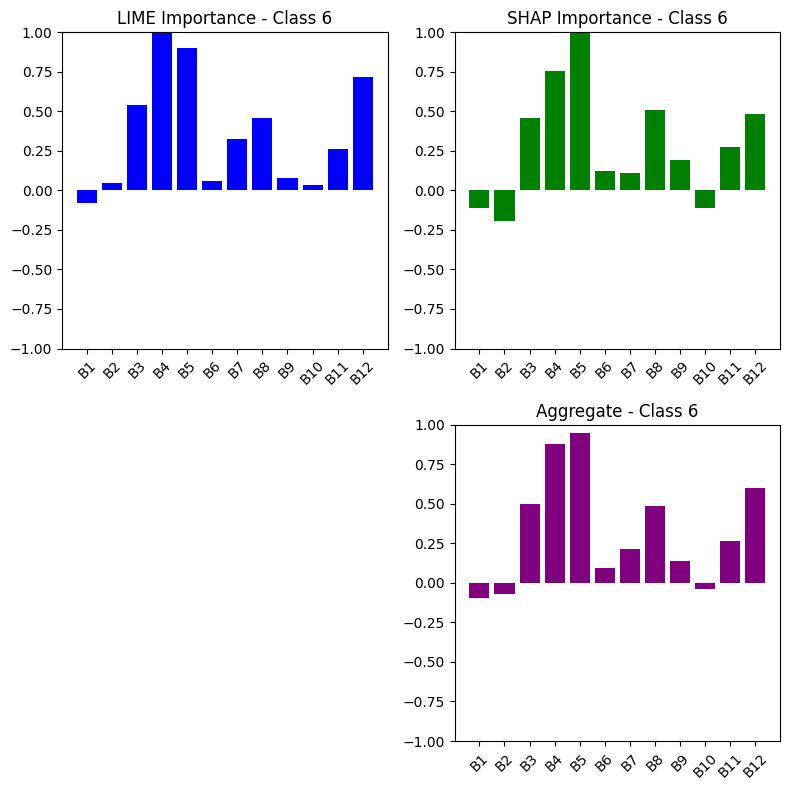

Spearman correlation (Avg vs Baseline): []
RBO (Avg vs Baseline): []
Jaccard Similarity (Avg vs Baseline): []
Spearman nan ± nan
RBO nan ± nan
Jaccard nan ± nan

CLASS 7

F1-Base: 0.79

Top bands by LIME:     ['B8', 'B7', 'B11', 'B9', 'B10']
Top bands by SHAP:     ['B8', 'B4', 'B7', 'B5', 'B9']

Same-Sign Score (LIME vs SHAP):     0.75

Spearman correlation (LIME vs SHAP):     0.560

RBO (LIME vs SHAP):     0.275

Jaccard Similarity (LIME vs SHAP):     0.429


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:218: RuntimeWarning: Degrees of freedom <= 0 for slice
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:175: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:210: RuntimeWarning: invalid value encountered in scalar divide


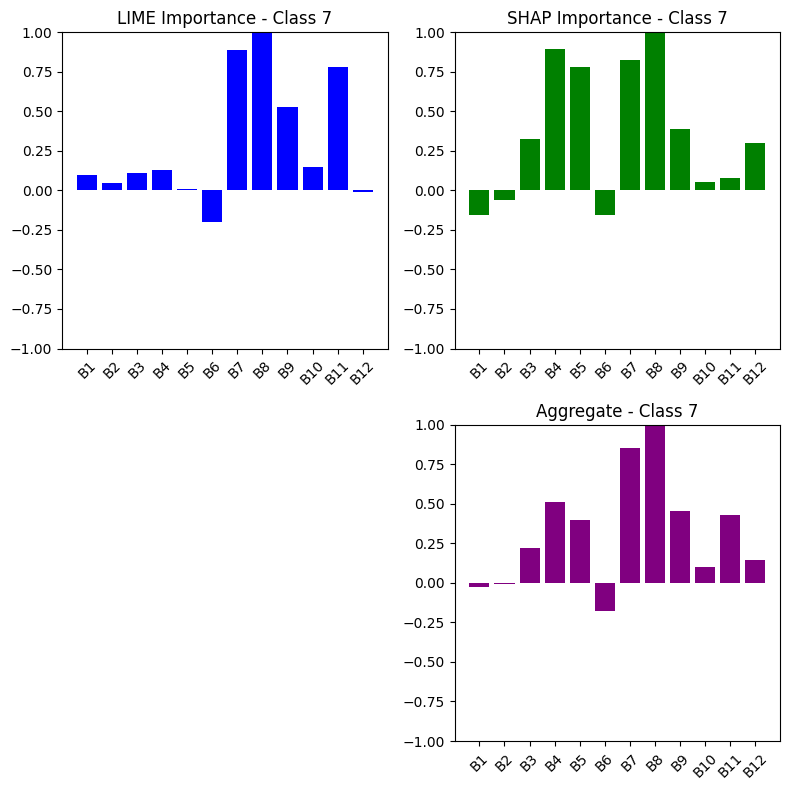

Spearman correlation (Avg vs Baseline): []
RBO (Avg vs Baseline): []
Jaccard Similarity (Avg vs Baseline): []
Spearman nan ± nan
RBO nan ± nan
Jaccard nan ± nan

CLASS 8

F1-Base: 0.81

Top bands by LIME:     ['B4', 'B8', 'B12', 'B5', 'B2']
Top bands by SHAP:     ['B8', 'B4', 'B12', 'B5', 'B9']

Same-Sign Score (LIME vs SHAP):     0.9166666666666666

Spearman correlation (LIME vs SHAP):     0.928

RBO (LIME vs SHAP):     0.296

Jaccard Similarity (LIME vs SHAP):     0.667


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:218: RuntimeWarning: Degrees of freedom <= 0 for slice
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:175: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:210: RuntimeWarning: invalid value encountered in scalar divide


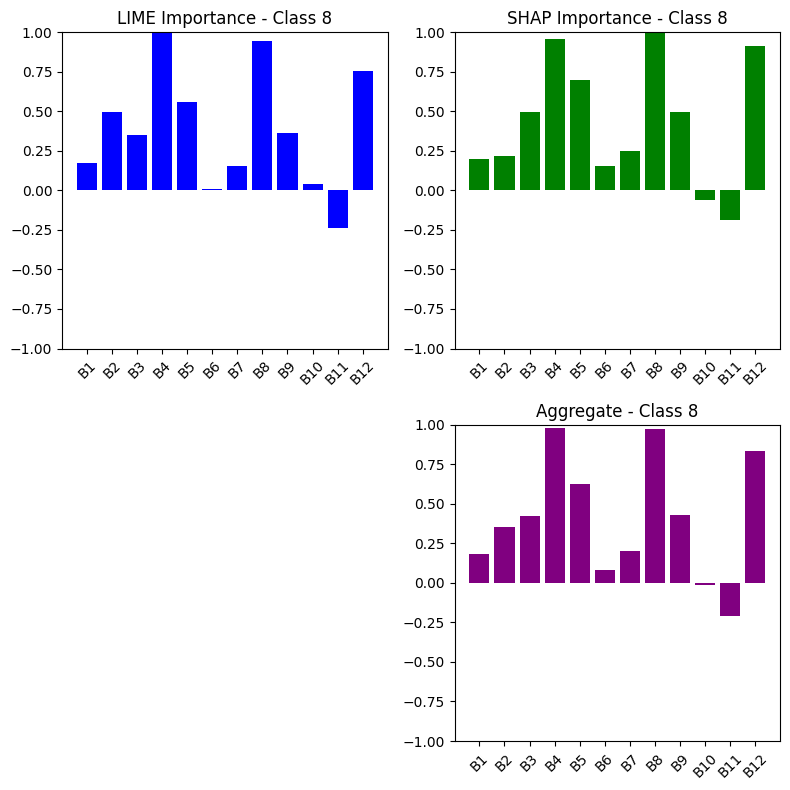

Spearman correlation (Avg vs Baseline): []
RBO (Avg vs Baseline): []
Jaccard Similarity (Avg vs Baseline): []
Spearman nan ± nan
RBO nan ± nan
Jaccard nan ± nan

CLASS 9

F1-Base: 0.89

Top bands by LIME:     ['B11', 'B8', 'B12', 'B9', 'B7']
Top bands by SHAP:     ['B8', 'B11', 'B9', 'B12', 'B4']

Same-Sign Score (LIME vs SHAP):     0.8333333333333334

Spearman correlation (LIME vs SHAP):     0.832

RBO (LIME vs SHAP):     0.269

Jaccard Similarity (LIME vs SHAP):     0.667


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:218: RuntimeWarning: Degrees of freedom <= 0 for slice
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:175: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:210: RuntimeWarning: invalid value encountered in scalar divide


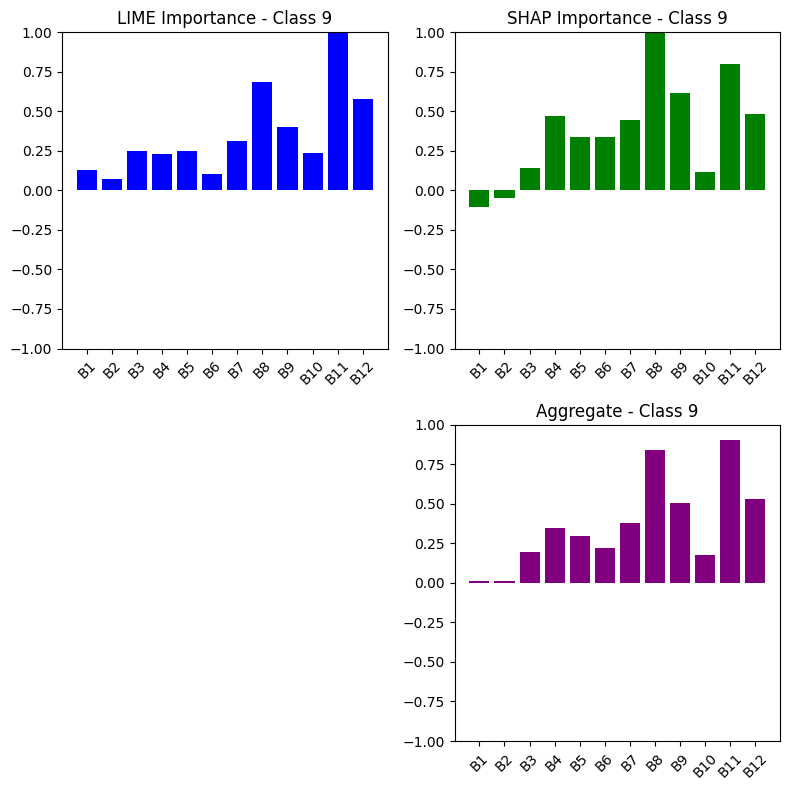

Spearman correlation (Avg vs Baseline): []
RBO (Avg vs Baseline): []
Jaccard Similarity (Avg vs Baseline): []
Spearman nan ± nan
RBO nan ± nan
Jaccard nan ± nan

CLASS 10

F1-Base: 0.98

Top bands by LIME:     ['B8', 'B6', 'B9', 'B5', 'B7']
Top bands by SHAP:     ['B8', 'B7', 'B9', 'B6', 'B5']

Same-Sign Score (LIME vs SHAP):     0.9166666666666666

Spearman correlation (LIME vs SHAP):     0.909

RBO (LIME vs SHAP):     0.319

Jaccard Similarity (LIME vs SHAP):     1.000


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:218: RuntimeWarning: Degrees of freedom <= 0 for slice
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:175: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:210: RuntimeWarning: invalid value encountered in scalar divide


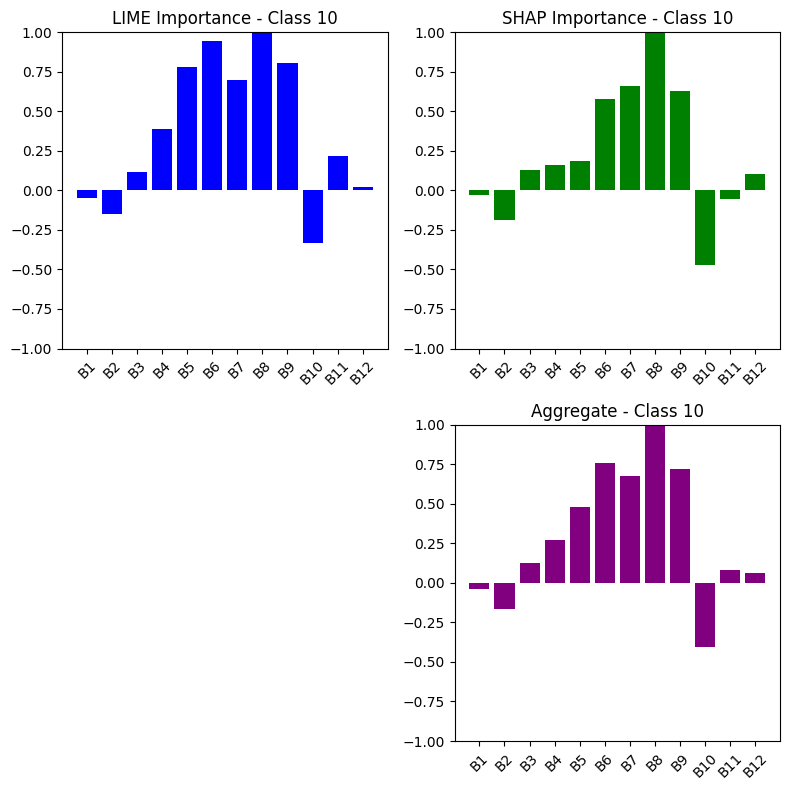

Spearman correlation (Avg vs Baseline): []
RBO (Avg vs Baseline): []
Jaccard Similarity (Avg vs Baseline): []
Spearman nan ± nan
RBO nan ± nan
Jaccard nan ± nan

CLASS 11

F1-Base: 0.84

Top bands by LIME:     ['B11', 'B4', 'B12', 'B5', 'B3']
Top bands by SHAP:     ['B11', 'B8', 'B4', 'B9', 'B7']

Same-Sign Score (LIME vs SHAP):     0.8333333333333334

Spearman correlation (LIME vs SHAP):     0.555

RBO (LIME vs SHAP):     0.262

Jaccard Similarity (LIME vs SHAP):     0.250


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:218: RuntimeWarning: Degrees of freedom <= 0 for slice
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:175: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:210: RuntimeWarning: invalid value encountered in scalar divide


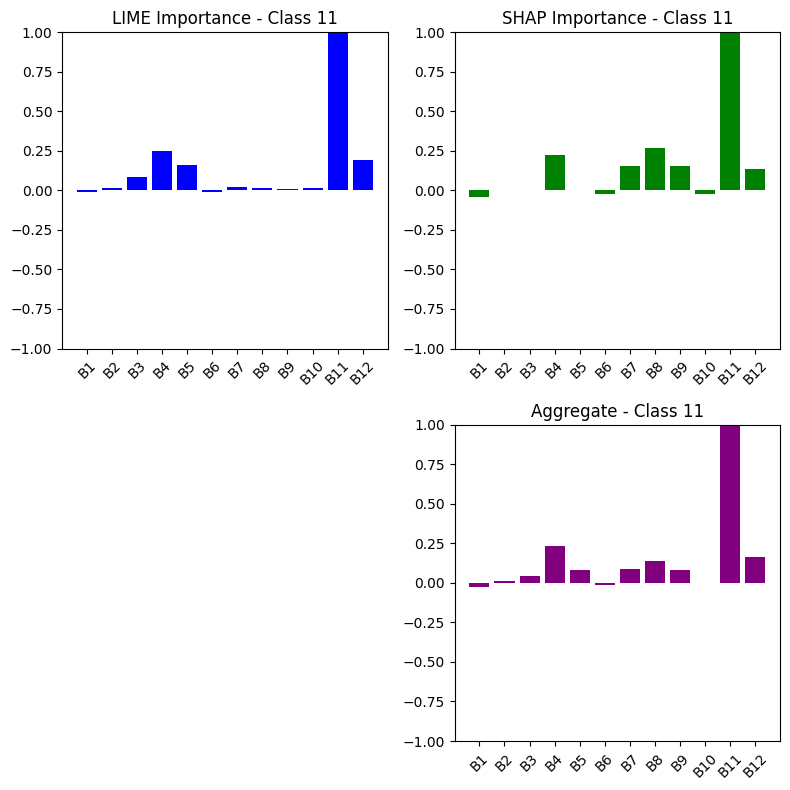

Spearman correlation (Avg vs Baseline): []
RBO (Avg vs Baseline): []
Jaccard Similarity (Avg vs Baseline): []
Spearman nan ± nan
RBO nan ± nan
Jaccard nan ± nan

CLASS 12

F1-Base: 0.73

Top bands by LIME:     ['B4', 'B5', 'B12', 'B3', 'B8']
Top bands by SHAP:     ['B5', 'B4', 'B8', 'B12', 'B3']

Same-Sign Score (LIME vs SHAP):     0.6666666666666666

Spearman correlation (LIME vs SHAP):     0.809

RBO (LIME vs SHAP):     0.264

Jaccard Similarity (LIME vs SHAP):     1.000


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:218: RuntimeWarning: Degrees of freedom <= 0 for slice
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:175: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:210: RuntimeWarning: invalid value encountered in scalar divide


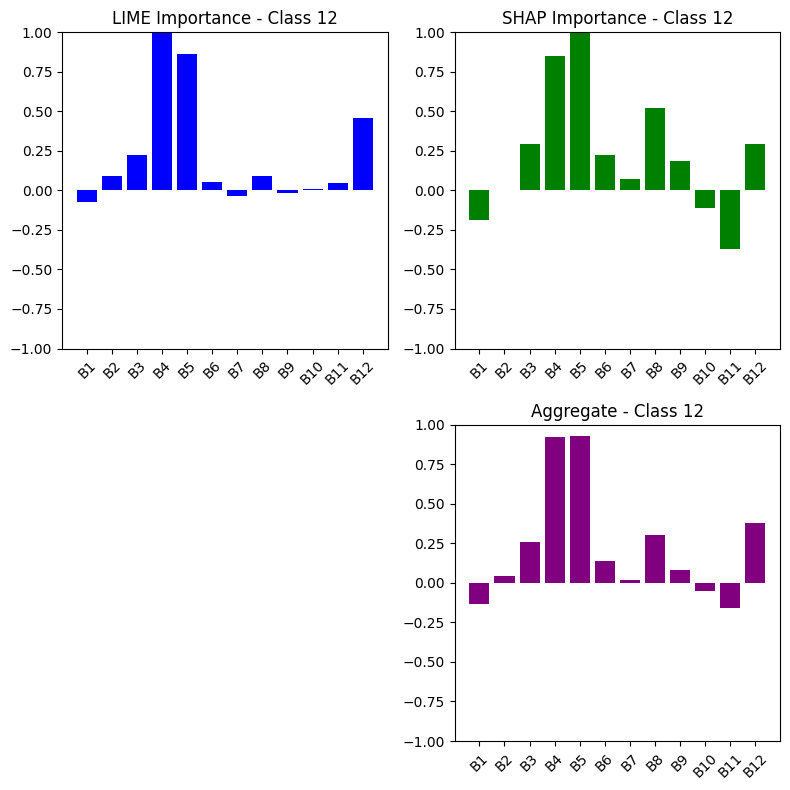

Spearman correlation (Avg vs Baseline): []
RBO (Avg vs Baseline): []
Jaccard Similarity (Avg vs Baseline): []
Spearman nan ± nan
RBO nan ± nan
Jaccard nan ± nan

CLASS 13

F1-Base: 0.67

Top bands by LIME:     ['B11', 'B3', 'B4', 'B2', 'B8']
Top bands by SHAP:     ['B5', 'B4', 'B8', 'B3', 'B11']

Same-Sign Score (LIME vs SHAP):     0.9166666666666666

Spearman correlation (LIME vs SHAP):     0.671

RBO (LIME vs SHAP):     0.116

Jaccard Similarity (LIME vs SHAP):     0.667


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:218: RuntimeWarning: Degrees of freedom <= 0 for slice
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:175: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:210: RuntimeWarning: invalid value encountered in scalar divide


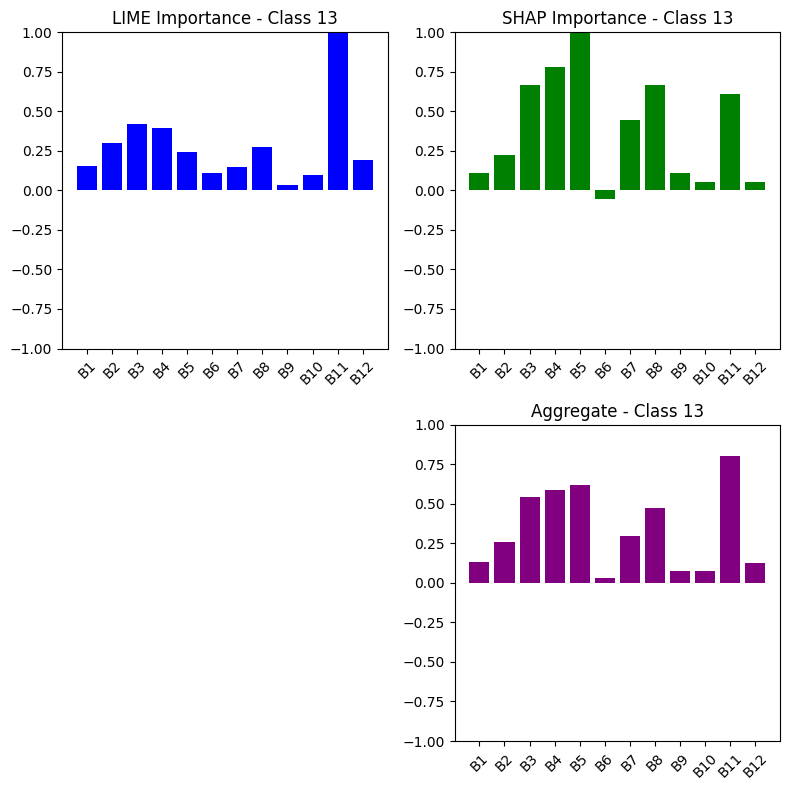

Spearman correlation (Avg vs Baseline): []
RBO (Avg vs Baseline): []
Jaccard Similarity (Avg vs Baseline): []
Spearman nan ± nan
RBO nan ± nan
Jaccard nan ± nan

CLASS 14

F1-Base: 0.71

Top bands by LIME:     ['B11', 'B3', 'B4', 'B2', 'B8']
Top bands by SHAP:     ['B4', 'B11', 'B5', 'B8', 'B2']

Same-Sign Score (LIME vs SHAP):     0.75

Spearman correlation (LIME vs SHAP):     0.428

RBO (LIME vs SHAP):     0.188

Jaccard Similarity (LIME vs SHAP):     0.667


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:218: RuntimeWarning: Degrees of freedom <= 0 for slice
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:175: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:210: RuntimeWarning: invalid value encountered in scalar divide


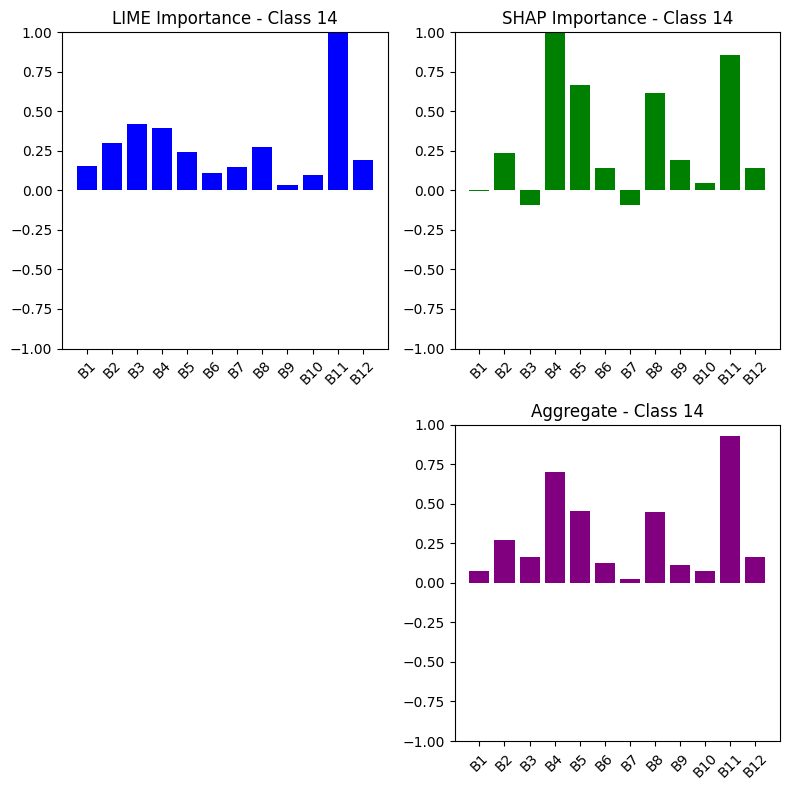

Spearman correlation (Avg vs Baseline): []
RBO (Avg vs Baseline): []
Jaccard Similarity (Avg vs Baseline): []
Spearman nan ± nan
RBO nan ± nan
Jaccard nan ± nan

CLASS 15

F1-Base: 0.39

Top bands by LIME:     ['B7', 'B11', 'B8', 'B3', 'B1']
Top bands by SHAP:     ['B11', 'B8', 'B3', 'B7', 'B1']

Same-Sign Score (LIME vs SHAP):     0.75

Spearman correlation (LIME vs SHAP):     0.909

RBO (LIME vs SHAP):     0.238

Jaccard Similarity (LIME vs SHAP):     1.000


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:218: RuntimeWarning: Degrees of freedom <= 0 for slice
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:175: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:210: RuntimeWarning: invalid value encountered in scalar divide


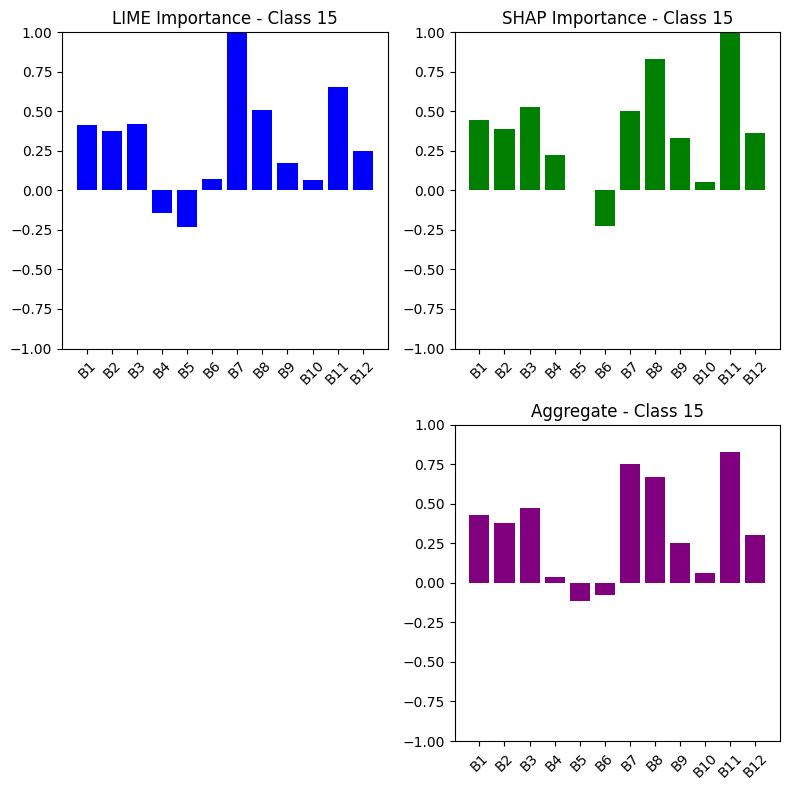

Spearman correlation (Avg vs Baseline): []
RBO (Avg vs Baseline): []
Jaccard Similarity (Avg vs Baseline): []
Spearman nan ± nan
RBO nan ± nan
Jaccard nan ± nan

CLASS 16

F1-Base: 0.57

Top bands by LIME:     ['B2', 'B4', 'B1', 'B8', 'B5']
Top bands by SHAP:     ['B2', 'B1', 'B8', 'B11', 'B4']

Same-Sign Score (LIME vs SHAP):     0.8333333333333334

Spearman correlation (LIME vs SHAP):     0.683

RBO (LIME vs SHAP):     0.306

Jaccard Similarity (LIME vs SHAP):     0.667


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:218: RuntimeWarning: Degrees of freedom <= 0 for slice
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:175: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:210: RuntimeWarning: invalid value encountered in scalar divide


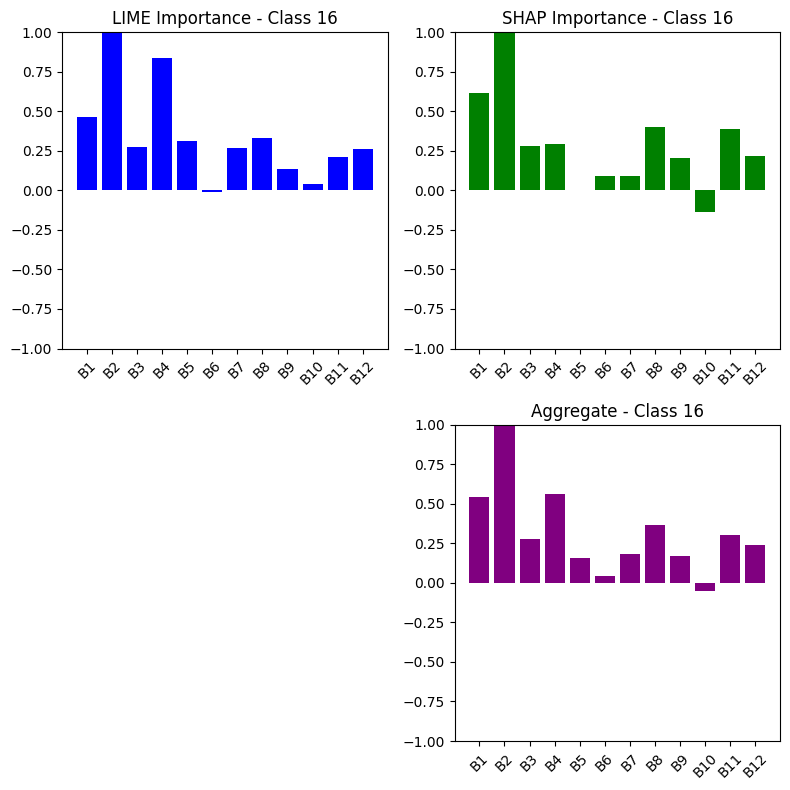

Spearman correlation (Avg vs Baseline): []
RBO (Avg vs Baseline): []
Jaccard Similarity (Avg vs Baseline): []
Spearman nan ± nan
RBO nan ± nan
Jaccard nan ± nan

CLASS 17

F1-Base: 0.7

Top bands by LIME:     ['B12', 'B11', 'B8', 'B7', 'B9']
Top bands by SHAP:     ['B11', 'B8', 'B4', 'B9', 'B7']

Same-Sign Score (LIME vs SHAP):     0.8333333333333334

Spearman correlation (LIME vs SHAP):     0.744

RBO (LIME vs SHAP):     0.188

Jaccard Similarity (LIME vs SHAP):     0.667


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:218: RuntimeWarning: Degrees of freedom <= 0 for slice
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:175: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:210: RuntimeWarning: invalid value encountered in scalar divide


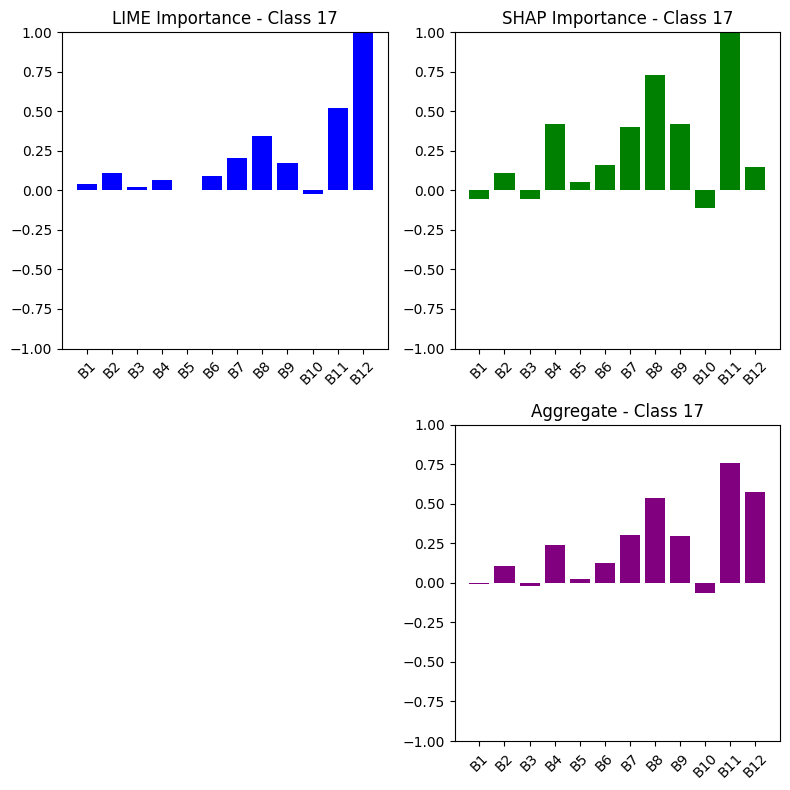

Spearman correlation (Avg vs Baseline): []
RBO (Avg vs Baseline): []
Jaccard Similarity (Avg vs Baseline): []
Spearman nan ± nan
RBO nan ± nan
Jaccard nan ± nan

CLASS 18

F1-Base: 0.68

Top bands by LIME:     ['B4', 'B3', 'B5', 'B12', 'B2']
Top bands by SHAP:     ['B3', 'B4', 'B12', 'B5', 'B2']

Same-Sign Score (LIME vs SHAP):     0.75

Spearman correlation (LIME vs SHAP):     0.949

RBO (LIME vs SHAP):     0.283

Jaccard Similarity (LIME vs SHAP):     1.000


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:218: RuntimeWarning: Degrees of freedom <= 0 for slice
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:175: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:210: RuntimeWarning: invalid value encountered in scalar divide


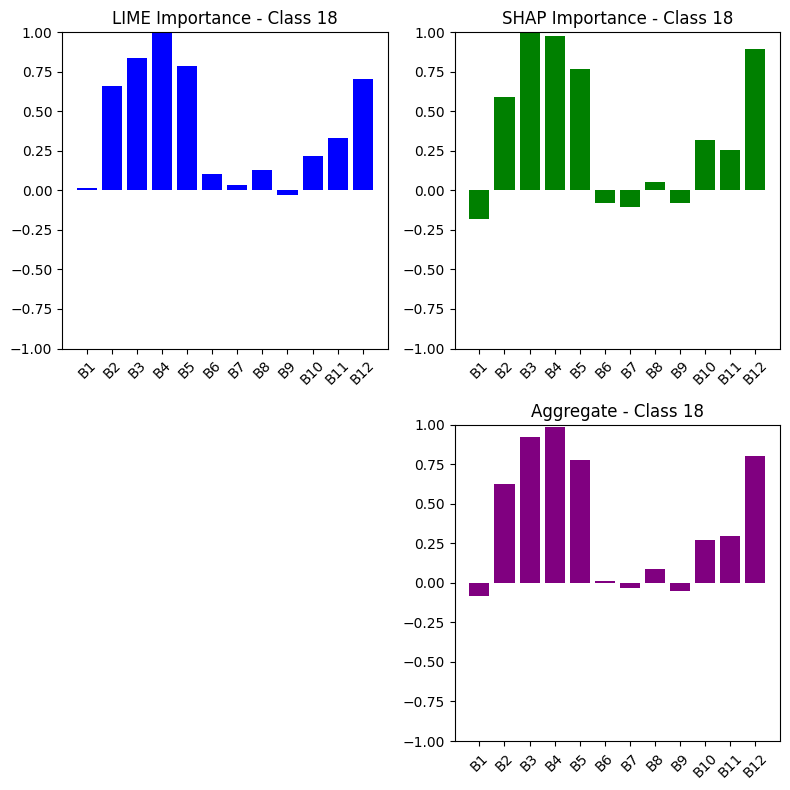

Spearman correlation (Avg vs Baseline): []
RBO (Avg vs Baseline): []
Jaccard Similarity (Avg vs Baseline): []
Spearman nan ± nan
RBO nan ± nan
Jaccard nan ± nan


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:218: RuntimeWarning: Degrees of freedom <= 0 for slice
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:175: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:210: RuntimeWarning: invalid value encountered in scalar divide


In [ ]:
import numpy as np
from scipy.stats import spearmanr, kendalltau
import matplotlib.pyplot as plt
import rbo
import seaborn as sns

# Band labels
bands = [f'B{i+1}' for i in range(12)]

f1_base = [0.88, 0.85, 0.89, 0.67, 0.73, 0.58, 0.54, 0.79, 0.81, 0.89,
           0.98, 0.84, 0.73, 0.67, 0.71, 0.39, 0.57, 0.70, 0.68]

sign_score_lime_shaps = []

spearmanrs_lime_shaps = []
spearmanrs_lime_base = []
spearmanrs_shap_base = []

rbo_lime_shaps = []

jaccard_top5_lime_shap = []

avg_plots_lime_shaps = []

# Arrays to store metrics between avg_baseline
spearman_list = []
rbo_list = []
jaccard_list = []

# kendalls_lime_shaps = []
# kendalls_lime_base = []
# kendalls_shap_base = []

# Dữ liệu cho nhiều class
all_lime = [
    [-0.0045, -0.0005, 0.0070, 0.0150, 0.0095, -0.0075, 0.0135, 0.0120, 0.0042, 0.0038, 0.0035, 0.0102],
    [ 0.0375,  0.0364,  0.0728,  0.0953,  0.0345,  0.00013,  0.0719,  0.1312,  0.0224,  0.0272,  0.2345,  0.0885],
    [ 0.038, 0.036, 0.073, 0.096, 0.035, 0.073, 0.132, 0.020, 0.026, 0.221, 0.090, 0.089],
    [-0.0241, -0.0003, 0.0998, 0.0834, 0.0815, 0.0236, -0.0335, 0.0812, 0.0049,  0.0025, 0.3498, 0.0762],
    [-0.0740, -0.0156, 0.1857, 0.1292, 0.0580, -0.0328, -0.0123, 0.1336, 0.0170, 0.0121, 0.3268, 0.0788],
    [-0.0105, -0.0095, 0.1300, 0.1189, 0.1315, 0.0248, 0.0531, 0.0764, 0.0157, 0.0098, 0.0468, 0.1197],
    [-0.0131, 0.0076, 0.0870, 0.1606, 0.1447, 0.0099, 0.0518, 0.0740, 0.0130, 0.0051, 0.0420, 0.1155],
    [ 0.0058, 0.0026, 0.0063, 0.0076, 0.0006, -0.0115, 0.0513, 0.0577, 0.0303, 0.0084, 0.0450, -0.0005],
    [ 0.0327, 0.0944, 0.0668, 0.1911, 0.1066, 0.0023, 0.0292, 0.1807, 0.0689, 0.0077, -0.0453, 0.1447],

    [0.0281,0.0152,0.0548,0.0494,0.0543,0.0231,0.0674,0.1490,0.0876,0.0515,0.2172,0.1261],
    [-0.0113,-0.0337,0.0260,0.0870,0.1738,0.2105,0.1552,0.2230,0.1797,-0.0742,0.0489,0.0044],
    [-0.004381,0.008731,0.042431,0.124102,0.078418,-0.003929,0.009580,0.006680,0.004440,0.008484,0.496399,0.096500],
    [-0.023210,0.027083,0.067536,0.304130,0.262197,0.016843,-0.011267,0.027790,-0.004908,0.002495,0.014867,0.139627],
    [0.0356,0.0700,0.0983,0.0929,0.0561,0.0261,0.0346,0.0646,0.0087,0.0231,0.2338,0.0445],
    [0.035586,0.070012,0.098331,0.092897,0.056111,0.026129,0.034567,0.064590,0.008653,0.023127,0.233751,0.044503],
    [0.0946,0.0853,0.0953,-0.0322,-0.0532,0.0158,0.2279,0.1154,0.0402,0.0149,0.1484,0.0573],
    [0.0850,0.1818,0.0499,0.1521,0.0572,-0.0015,0.0489,0.0603,0.0246,0.0073,0.0389,0.0481],
    [0.0203,0.0563,0.0095,0.0332,0.0002,0.0453,0.1028,0.1758,0.0885,-0.0122,0.2639,0.5074],
    [0.0007,0.0273,0.0346,0.0412,0.0323,0.0042,0.0015,0.0054,-0.0011,0.0091,0.0137,0.0290]
]
all_shap = [
    [-0.025, -0.01, 0.11, 0.16, 0.21, 0.001, 0.045, 0.14, 0.035, 0.005, 0.02, 0.095],
    [-0.005, 0.01, 0.045, 0.095, 0.015, -0.01, 0.095, 0.152, 0.065, 0.0001, 0.255, 0.085],
    [0.002, 0.02, 0.048, 0.11, 0.108, 0.027, 0.03, 0.128, 0.055, -0.002, 0.22, 0.125],
    [-0.022, -0.005, 0.043, 0.097, 0.087, -0.018, 0.033, 0.137, 0.060, 0.001, 0.11, 0.058],
    [-0.035, -0.015, 0.037, 0.102, 0.072, 0.035, 0.11, 0.202, 0.096, -0.035, 0.172, 0.012],
    [-0.015, -0.03, 0.058, 0.115, 0.119, 0.04, 0.073, 0.12, 0.04, -0.02, 0.068, 0.057],
    [-0.02, -0.035, 0.083, 0.138, 0.182, 0.022, 0.02, 0.093, 0.035, -0.02, 0.05, 0.088],
    [-0.03, -0.012, 0.063, 0.172, 0.15, -0.03, 0.158, 0.192, 0.075, 0.01, 0.015, 0.057],
    [0.032, 0.035, 0.08, 0.155, 0.113, 0.025, 0.04, 0.162, 0.08, -0.01, -0.03, 0.148],
    [-0.022, -0.01, 0.03, 0.1, 0.072, 0.071, 0.095, 0.212, 0.13, 0.025, 0.17, 0.103],
    [-0.01, -0.07, 0.05, 0.06, 0.07, 0.22, 0.25, 0.38, 0.24, -0.18, -0.02, 0.04],
    [-0.02, 0.001, 0.00, 0.10, 0.001, -0.01, 0.07, 0.12, 0.07, -0.01, 0.45, 0.06],
    [-0.05, 0.0001, 0.08, 0.23, 0.27, 0.06, 0.02, 0.14, 0.05, -0.03, -0.10,0.08],
    [0.02, 0.04, 0.12, 0.14, 0.18, -0.01, 0.08, 0.12, 0.02, 0.01, 0.11, 0.01],
    [-0.0001, 0.05,-0.02, 0.21, 0.14, 0.03, -0.02, 0.13, 0.04, 0.01, 0.18, 0.03],
    [0.08, 0.07, 0.095, 0.04, 0.0001, -0.04, 0.09, 0.15, 0.06, 0.01, 0.18, 0.065],
    [0.135, 0.22, 0.062, 0.064, 0.001, 0.02, 0.02, 0.088, 0.045, -0.03, 0.085, 0.048],
    [-0.015, 0.03, -0.015, 0.115, 0.015, 0.045, 0.11, 0.20, 0.115, -0.03, 0.275, 0.04],
    [-0.035, 0.115, 0.195, 0.19, 0.15, -0.015, -0.02, 0.01, -0.015, 0.062, 0.05, 0.175]

]


# ======================== Hàm phụ ========================
def top_k_indices(values, k=5, reverse=True):
    return np.argsort(values)[::-1 if reverse else 1][:k]

def jaccard_similarity(list1, list2):
    set1, set2 = set(list1), set(list2)
    return len(set1 & set2) / len(set1 | set2)

def same_sign_score(arr1, arr2):
    score = 0
    for a, b in zip(arr1, arr2):
        if a == 0 or b == 0:
            continue
        if (a > 0 and b > 0) or (a < 0 and b < 0):
            score += 1
    return score/12
def normalize_to_neg1_pos1(arr):
    max_abs = np.max(np.abs(arr))
    if max_abs == 0:
        return arr  # tránh chia 0
    return arr / max_abs


intersection_ratios = []
# ======================== Vòng lặp các class ========================
for i, (lime_importance, shap_importance) in enumerate(zip(all_lime, all_shap), start=0):
    print("="*80)
    print(f"\nCLASS {i}")
    print(f"\nF1-Base: {f1_base[i]}")

    # Top-K band names
    top_lime_idx = top_k_indices(lime_importance)
    top_shap_idx = top_k_indices(shap_importance)

    top_lime = [bands[j] for j in top_lime_idx]
    top_shap = [bands[j] for j in top_shap_idx]

    print(f"\nTop bands by LIME:     {top_lime}")
    print(f"Top bands by SHAP:     {top_shap}")

    # Same-sign score
    sign_score_lime_shap = same_sign_score(lime_importance, shap_importance)
    sign_score_lime_shaps.append(sign_score_lime_shap)
    print(f"\nSame-Sign Score (LIME vs SHAP):     {sign_score_lime_shap}")

    # Tính Spearman
    rho_lime_shap, _ = spearmanr(lime_importance, shap_importance)

    spearmanrs_lime_shaps.append(rho_lime_shap)

    print(f"\nSpearman correlation (LIME vs SHAP):     {rho_lime_shap:.3f}")

    # RBO
    rbo_lime_shap = rbo.RankingSimilarity(top_lime, top_shap).rbo(p=0.9)
    rbo_lime_shaps.append(rbo_lime_shap)

    print(f"\nRBO (LIME vs SHAP):     {rbo_lime_shap:.3f}")

    # Jaccard
    jac_lime_shap = jaccard_similarity(top_lime, top_shap)

    jaccard_top5_lime_shap.append(jac_lime_shap)

    print(f"\nJaccard Similarity (LIME vs SHAP):     {jac_lime_shap:.3f}")

    # -------------------------------- Visualization --------------------------------
    x = np.arange(len(bands))
    all_values = lime_importance + shap_importance
    y_min = min(all_values) - 0.1
    y_max = max(all_values) + 0.1

    plt.figure(figsize=(8, 8))

    # Subplot 1
    plt.subplot(2, 2, 1)
    plt.bar(x, normalize_to_neg1_pos1(lime_importance), color='blue')
    plt.xticks(x, bands, rotation=45)
    plt.title(f'LIME Importance - Class {i}')
    plt.ylim(-1, 1)

    # Subplot 2
    plt.subplot(2, 2, 2)
    plt.bar(x, normalize_to_neg1_pos1(shap_importance), color='green')
    plt.xticks(x, bands, rotation=45)
    plt.title(f'SHAP Importance - Class {i}')
    plt.ylim(-1, 1)

    # Subplot 4
    avg_plot = (normalize_to_neg1_pos1(lime_importance) + normalize_to_neg1_pos1(shap_importance)) / 2
    avg_plots_lime_shaps.append(avg_plot)
    plt.subplot(2, 2, 4)
    plt.bar(x, avg_plot, color='purple')
    plt.xticks(x, bands, rotation=45)
    plt.title(f'Aggregate - Class {i}')
    plt.ylim(-1, 1)

    plt.tight_layout()
    plt.show()

    print(f"Spearman correlation (Avg vs Baseline): {spearman_list}")
    print(f"RBO (Avg vs Baseline): {rbo_list}")
    print(f"Jaccard Similarity (Avg vs Baseline): {jaccard_list}")
    print("Spearman {:.3f} ± {:.3f}".format(np.mean(spearman_list), np.std(spearman_list)))
    print("RBO {:.3f} ± {:.3f}".format(np.mean(rbo_list), np.std(rbo_list)))
    print("Jaccard {:.3f} ± {:.3f}".format(np.mean(jaccard_list), np.std(jaccard_list)))

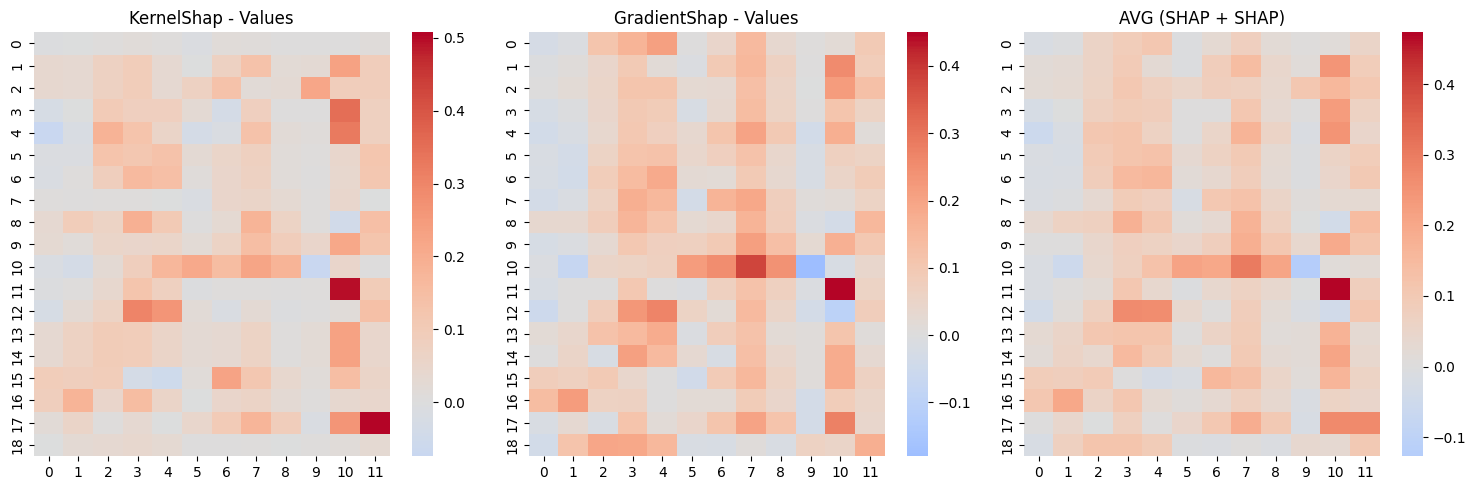

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Scale LIME cho dễ nhìn
all_lime_scaled = np.array(all_lime)

# Tính trung bình LIME + SHAP
avg_plot = (all_lime_scaled + all_shap) / 2

# Tạo figure 1x3
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Heatmap 1: LIME
sns.heatmap(all_lime_scaled, annot=False, cmap="coolwarm", center=0, ax=axes[0])
axes[0].set_title("KernelShap - Values")

# Heatmap 2: SHAP
sns.heatmap(all_shap, annot=False, cmap="coolwarm", center=0, ax=axes[1])
axes[1].set_title("GradientShap - Values")

# Heatmap 3: AVG (LIME + SHAP)
sns.heatmap(avg_plot, annot=False, cmap="coolwarm", center=0, ax=axes[2])
axes[2].set_title("AVG (SHAP + SHAP)")

plt.tight_layout()
plt.show()


In [ ]:
print(sign_score_lime_shaps)
print(spearmanrs_lime_shaps)
print(rbo_lime_shaps)
print(jaccard_top5_lime_shap)

print("Same-Sign: {:.3f} ± {:.3f}".format(np.mean(sign_score_lime_shaps), np.std(sign_score_lime_shaps)))
print("Spearman: {:.3f} ± {:.3f}".format(np.mean(spearmanrs_lime_shaps), np.std(spearmanrs_lime_shaps)))
print("RBO: {:.3f} ± {:.3f}".format(np.mean(rbo_lime_shaps), np.std(rbo_lime_shaps)))
print("Jaccard: {:.3f} ± {:.3f}".format(np.mean(jaccard_top5_lime_shap), np.std(jaccard_top5_lime_shap)))

[0.9166666666666666, 0.8333333333333334, 0.9166666666666666, 0.8333333333333334, 0.75, 0.9166666666666666, 0.8333333333333334, 0.75, 0.9166666666666666, 0.8333333333333334, 0.9166666666666666, 0.8333333333333334, 0.6666666666666666, 0.9166666666666666, 0.75, 0.75, 0.8333333333333334, 0.8333333333333334, 0.75]
[np.float64(0.8391608391608393), np.float64(0.80910807093079), np.float64(-0.18213688176797005), np.float64(0.7062937062937064), np.float64(0.6234685568211282), np.float64(0.7740817475138726), np.float64(0.9071817764981586), np.float64(0.5604211746706771), np.float64(0.9281975705483089), np.float64(0.8321678321678322), np.float64(0.9090909090909092), np.float64(0.5553680003872303), np.float64(0.80910807093079), np.float64(0.6713625827465884), np.float64(0.42807281055172736), np.float64(0.9090909090909092), np.float64(0.6830133066298876), np.float64(0.743864228171854), np.float64(0.9492133645984593)]
[0.18793799999999994, 0.3511629999999999, 0.075816, 0.20616299999999999, 0.1930409

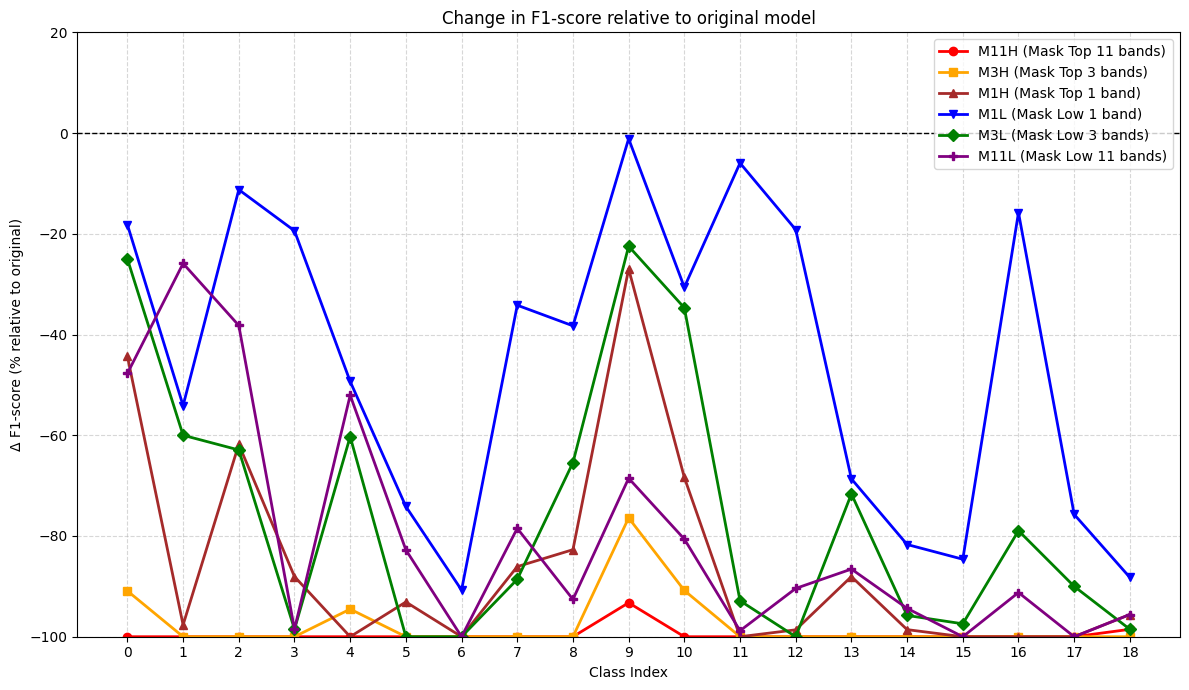

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Index 0-18
indices = list(range(19))

# Data mới từ bảng người dùng cung cấp
M11H = np.array([0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01])
M3H  = np.array([0.08,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.21,0.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00])
M1H  = np.array([0.49,0.02,0.34,0.08,0.00,0.04,0.00,0.11,0.14,0.65,0.31,0.00,0.01,0.08,0.01,0.00,0.00,0.00,0.03])
F1   = np.array([0.88,0.85,0.89,0.67,0.73,0.58,0.54,0.79,0.81,0.89,0.98,0.84,0.73,0.67,0.71,0.39,0.57,0.70,0.68])
M1L  = np.array([0.72,0.39,0.79,0.54,0.37,0.15,0.05,0.52,0.50,0.88,0.68,0.79,0.59,0.21,0.13,0.06,0.48,0.17,0.08])
M3L  = np.array([0.66,0.34,0.33,0.01,0.29,0.00,0.00,0.09,0.28,0.69,0.64,0.06,0.00,0.19,0.03,0.01,0.12,0.07,0.01])
M11L = np.array([0.46,0.63,0.55,0.01,0.35,0.10,0.00,0.17,0.06,0.28,0.19,0.01,0.07,0.09,0.04,0.00,0.05,0.00,0.03])

# Chuẩn hóa % so với gốc và trừ 100 để origin=0
percent_M11H = (M11H / F1 * 100) - 100
percent_M3H  = (M3H  / F1 * 100) - 100
percent_M1H  = (M1H  / F1 * 100) - 100
percent_M1L  = (M1L  / F1 * 100) - 100
percent_M3L  = (M3L  / F1 * 100) - 100
percent_M11L = (M11L / F1 * 100) - 100

# Vẽ đồ thị
plt.figure(figsize=(12,7))
plt.plot(indices, percent_M11H, marker='o', color='red', linewidth=2, label='M11H (Mask Top 11 bands)')
plt.plot(indices, percent_M3H,  marker='s', color='orange', linewidth=2, label='M3H (Mask Top 3 bands)')
plt.plot(indices, percent_M1H,  marker='^', color='brown', linewidth=2, label='M1H (Mask Top 1 band)')

plt.plot(indices, percent_M1L,  marker='v', color='blue', linewidth=2, label='M1L (Mask Low 1 band)')
plt.plot(indices, percent_M3L,  marker='D', color='green', linewidth=2, label='M3L (Mask Low 3 bands)')
plt.plot(indices, percent_M11L, marker='P', color='purple', linewidth=2, label='M11L (Mask Low 11 bands)')

plt.axhline(0, color='black', linestyle='--', linewidth=1)  # gốc
plt.xlabel('Class Index')
plt.ylabel('Δ F1-score (% relative to original)')
plt.title('Change in F1-score relative to original model')
plt.xticks(indices)
plt.ylim(-100, 20)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()
